In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.pyplot import MultipleLocator

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = xr.open_dataset('/Users/peizhangcheng/Downloads/CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20170901-20180228.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:                 (lat: 2, lon: 5, time: 4344)
Coordinates:
  * time                    (time) datetime64[ns] 2017-09-01T00:30:14.0624999...
  * lon                     (lon) float32 155.5 156.5 157.5 158.5 159.5
  * lat                     (lat) float32 -54.5 -53.5
Data variables:
    ini_sfc_sw_down_clr_1h  (time, lat, lon) float32 ...
    ini_sfc_sw_down_all_1h  (time, lat, lon) float32 ...
    ini_sfc_lw_down_clr_1h  (time, lat, lon) float32 ...
    ini_sfc_lw_down_all_1h  (time, lat, lon) float32 ...
Attributes:
    title:        CERES SYN1deg 1-Hourly data
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Satellites used: Terra 3/2000 - 6/2002; Terra+Aqua 7/2002 -...
    Version:      Edition 4.1: Release Date August 22, 2019
    DOI:          10.5067/Terra-MODIS/CERES/SYN1deg-1Hour_L3.004A;10.5067/Ter...
    Fill_Value:   Fill Value is -999.0

In [8]:
data = data.interp(lat=-54.4996, lon=158.9437)

In [5]:
Years = [17,18]
Months = [1,2,10,11,12]
Days31 = list(range(1,32))
Days30 = list(range(1,31))
Days28 = list(range(1,29))
Hours = list(range(0,24))

daily_obs_SW = pd.Series(dtype='float64',name='Obs SW')
daily_obs_LW = pd.Series(dtype='float64',name='Obs LW')
daily_obs_CRE = pd.Series(dtype='float64',name='Obs CRE')
daily_obs_SWCRE = pd.Series(dtype='float64',name='Obs SWCRE')
daily_obs_LWCRE = pd.Series(dtype='float64',name='Obs LWCRE')
pd_ACCESS_SWcs = pd.Series(dtype='float64',name='ACCESS SWcs')
pd_ACCESS_LWcs = pd.Series(dtype='float64',name='ACCESS LWcs')
pd_ACCESS_CRE = pd.Series(dtype='float64',name='ACCESS CRE')
pd_ACCESS_SWCRE = pd.Series(dtype='float64',name='ACCESS SWCRE')
pd_ACCESS_LWCRE = pd.Series(dtype='float64',name='ACCESS LWCRE')

In [6]:
for Year in Years:
    for Month in Months:
        if (Year == 17) and (Month < 10):
            continue
        elif (Year == 18) and (Month > 2):
            continue
        else:
            if (Month == 1) or (Month == 10) or (Month == 12):
                for Day in Days31:
                    filename = '/Users/peizhangcheng/Desktop/Honours/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'
                    data = xr.open_dataset(filename)
                    data = data.interp(lat=-54.4996, lon=158.9437)
                    # open the model output
                    
                    pd_data1D_rsds = pd.Series(data.rsds.to_pandas(),name='ACCESS SW')
                    pd_data1D_rlds = pd.Series(data.rlds.to_pandas(),name='ACCESS LW')
                    pd_data1D_rsdscs = pd.Series(data.rsdscs.to_pandas(),name='ACCESS SWcs')
                    pd_data1D_rldscs = pd.Series(data.rldscs.to_pandas(),name='ACCESS LWcs')
                    
                    ACCESS_CRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                    ACCESS_SWCRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)
                    ACCESS_LWCRE = 0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                    
                    pd_ACCESS_SWcs = pd.concat([pd_ACCESS_SWcs,pd_data1D_rsdscs], axis=0)
                    pd_ACCESS_LWcs = pd.concat([pd_ACCESS_LWcs,pd_data1D_rldscs], axis=0)
                    pd_ACCESS_CRE = pd.concat([pd_ACCESS_CRE, ACCESS_CRE], axis=0)
                    pd_ACCESS_SWCRE = pd.concat([pd_ACCESS_SWCRE, ACCESS_SWCRE], axis=0)
                    pd_ACCESS_LWCRE = pd.concat([pd_ACCESS_LWCRE, ACCESS_LWCRE], axis=0)  
                    
            elif (Month == 11):
                for Day in Days30:
                    filename = '/Users/peizhangcheng/Desktop/Honours/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'                        
                    data = xr.open_dataset(filename)
                    data = data.interp(lat=-54.4996, lon=158.9437)
                    # open the model output
                
                    pd_data1D_rsds = pd.Series(data.rsds.to_pandas(),name='ACCESS SW')
                    pd_data1D_rlds = pd.Series(data.rlds.to_pandas(),name='ACCESS LW')
                    pd_data1D_rsdscs = pd.Series(data.rsdscs.to_pandas(),name='ACCESS SWclr')
                    pd_data1D_rldscs = pd.Series(data.rldscs.to_pandas(),name='ACCESS LWclr')
            
                    ACCESS_CRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                    ACCESS_SWCRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)
                    ACCESS_LWCRE = 0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                    
                    pd_ACCESS_SWcs = pd.concat([pd_ACCESS_SWcs,pd_data1D_rsdscs], axis=0)
                    pd_ACCESS_LWcs = pd.concat([pd_ACCESS_LWcs,pd_data1D_rldscs], axis=0)
                    pd_ACCESS_CRE = pd.concat([pd_ACCESS_CRE, ACCESS_CRE], axis=0)
                    pd_ACCESS_SWCRE = pd.concat([pd_ACCESS_SWCRE, ACCESS_SWCRE], axis=0)
                    pd_ACCESS_LWCRE = pd.concat([pd_ACCESS_LWCRE, ACCESS_LWCRE], axis=0)
                    
            else:
                for Day in Days28:
                    filename = '/Users/peizhangcheng/Desktop/Honours/Datasets/ACCESS_hourly/cc407a.ph.met20' + str(Year) + str(Month).rjust(2,'0') + str(Day).rjust(2,'0') + '.nc'                   
                    data = xr.open_dataset(filename)
                    data = data.interp(lat=-54.4996, lon=158.9437)
                    # open the model output
                    
                    pd_data1D_rsds = pd.Series(data.rsds.to_pandas(),name='ACCESS SW')
                    pd_data1D_rlds = pd.Series(data.rlds.to_pandas(),name='ACCESS LW')
                    pd_data1D_rsdscs = pd.Series(data.rsdscs.to_pandas(),name='ACCESS SWclr')
                    pd_data1D_rldscs = pd.Series(data.rldscs.to_pandas(),name='ACCESS LWclr') 
                    
                    ACCESS_CRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)+0.97*(pd_data1D_rlds-pd_data1D_rldscs)
                    ACCESS_SWCRE = (1-0.055)*(pd_data1D_rsds-pd_data1D_rsdscs)
                    ACCESS_LWCRE = 0.97*(pd_data1D_rlds-pd_data1D_rldscs)

                    pd_ACCESS_SWcs = pd.concat([pd_ACCESS_SWcs,pd_data1D_rsdscs], axis=0)
                    pd_ACCESS_LWcs = pd.concat([pd_ACCESS_LWcs,pd_data1D_rldscs], axis=0)
                    pd_ACCESS_CRE = pd.concat([pd_ACCESS_CRE, ACCESS_CRE], axis=0)
                    pd_ACCESS_SWCRE = pd.concat([pd_ACCESS_SWCRE, ACCESS_SWCRE], axis=0)
                    pd_ACCESS_LWCRE = pd.concat([pd_ACCESS_LWCRE, ACCESS_LWCRE], axis=0)

In [7]:
for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 10):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                fdir = '/Users/peizhangcheng/Desktop/Honours/Project/MQI Radiometers/Radiation_' + str(Year) + str(Month).rjust(2,'0') + '_v4.csv'
                daily_obs = pd.read_csv(fdir) 
                # open the observational data
                        
                daily_obs.index = pd.DatetimeIndex(daily_obs['DateTimeUT'])
                daily_obs = daily_obs.dropna()
                daily_obs.columns = ['DateTimeUT','Pyranometer_Avg','Pyrgeometer_Avg','CRE','SW_CRE','LW_CRE','SW_clr','LW_clr']
                
                daily_obs_SW = pd.concat([daily_obs_SW, daily_obs.Pyranometer_Avg], axis=0)
                daily_obs_LW = pd.concat([daily_obs_LW, daily_obs.Pyrgeometer_Avg], axis=0)

In [8]:
fdir = '/Users/peizhangcheng/Desktop/Honours/Project/ERA5/ERA5_shortwave_clearsky_surface_new.nc'
data1 = xr.open_dataset(fdir)
fdir = '/Users/peizhangcheng/Desktop/Honours/Project/ERA5/ERA5_longwave_clearsky_surface_new.nc'
data2 = xr.open_dataset(fdir)

In [9]:
era_sw = data1.to_dataframe()
#era_sw_daily = era_sw.resample('D').mean()
era_SWcs = era_sw.msdwswrfcs

era_lw = data2.to_dataframe()
#era_lw_daily = era_lw.resample('D').mean()
era_LWcs = era_lw.msdwlwrfcs

In [10]:
era_SWcs = era_SWcs['2017-10-01':'2018-02-28']

In [11]:
era_LWcs = era_LWcs['2017-10-01':'2018-02-28']

In [12]:
daily_obs_SW

2017-10-01 00:00:00    720.508342
2017-10-01 00:01:00    485.556338
2017-10-01 00:02:00    290.847237
2017-10-01 00:03:00    241.284507
2017-10-01 00:04:00    212.098917
                          ...    
2018-02-28 23:55:00    678.977031
2018-02-28 23:56:00    679.551788
2018-02-28 23:57:00    680.611051
2018-02-28 23:58:00    681.697183
2018-02-28 23:59:00    683.100867
Length: 217440, dtype: float64

In [13]:
daily_obs_LW

2017-10-01 00:00:00    288.195065
2017-10-01 00:01:00    294.345563
2017-10-01 00:02:00    298.972612
2017-10-01 00:03:00    302.627501
2017-10-01 00:04:00    304.913890
                          ...    
2018-02-28 23:55:00    266.326238
2018-02-28 23:56:00    266.606015
2018-02-28 23:57:00    265.941928
2018-02-28 23:58:00    266.126580
2018-02-28 23:59:00    266.326371
Length: 217440, dtype: float64

In [14]:
era_SWcs

time
2017-10-01 00:00:00    574.578735
2017-10-01 01:00:00    635.048645
2017-10-01 02:00:00    647.308533
2017-10-01 03:00:00    609.369080
2017-10-01 04:00:00    528.015320
                          ...    
2018-02-28 19:00:00      0.501852
2018-02-28 20:00:00     66.593491
2018-02-28 21:00:00    215.056519
2018-02-28 22:00:00    373.977264
2018-02-28 23:00:00    517.448547
Name: msdwswrfcs, Length: 3624, dtype: float32

In [15]:
era_LWcs

time
2017-10-01 00:00:00    243.515244
2017-10-01 01:00:00    242.249084
2017-10-01 02:00:00    242.471085
2017-10-01 03:00:00    244.214233
2017-10-01 04:00:00    244.720718
                          ...    
2018-02-28 19:00:00    250.405151
2018-02-28 20:00:00    250.368607
2018-02-28 21:00:00    250.491638
2018-02-28 22:00:00    250.993179
2018-02-28 23:00:00    251.758148
Name: msdwlwrfcs, Length: 3624, dtype: float32

In [16]:
era_SWcs = pd.Series(era_SWcs, name = 'ERA SWcs')
era_LWcs = pd.Series(era_LWcs, name = 'ERA LWcs')

In [17]:
era_cs = pd.concat([era_SWcs, era_LWcs], axis=1)

In [18]:
era_cs['Hour'] = era_cs.index.map(lambda x: x.strftime("%H"))

df1 = era_cs.groupby('Hour').mean()

In [19]:
pd_ACCESS_SWcs = pd.Series(pd_ACCESS_SWcs, name = 'ACCESS SWcs')
pd_ACCESS_LWcs = pd.Series(pd_ACCESS_LWcs, name = 'ACCESS LWcs')

In [20]:
pd_ACCESS_cs = pd.concat([pd_ACCESS_SWcs, pd_ACCESS_LWcs], axis=1)

In [21]:
#fig, ax = plt.subplots(1, figsize=(12,6))

pd_ACCESS_cs['Hour'] = pd_ACCESS_cs.index.map(lambda x: x.strftime("%H"))

df = pd_ACCESS_cs.groupby('Hour').mean()

#ax.plot(df.index, df['ACCESS SWcs']['mean'], linewidth=2.0)

#ax.legend()

#ticks = ax.get_xticks()
#ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 5))
#ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 25), minor=True)
#plt.show()

In [22]:
df

,ACCESS SWcs,ACCESS LWcs
Hour,,
00,830.708598,262.019635
01,850.421781,262.352560
02,823.723039,262.576774
03,752.530259,262.744405
04,642.679960,262.835203
05,502.988904,262.907615
06,346.021232,262.923418
07,189.720492,262.947327
08,67.591784,262.869347


In [23]:
df1

,ERA SWcs,ERA LWcs
Hour,,
00,776.911682,255.494385
01,839.022583,255.853027
02,856.202332,256.020660
03,827.021240,256.146332
04,753.320068,256.418854
05,641.000305,256.750153
06,499.733521,256.950714
07,342.132507,257.351196
08,186.968964,257.242706


In [24]:
df1['ERA SWcs shifted'] = np.zeros(24)
df1['ERA LWcs shifted'] = np.zeros(24)

In [25]:
for row in np.arange(24):
    if row < 23:
        df1['ERA SWcs shifted'][row] = df1['ERA SWcs'][row + 1]
        df1['ERA LWcs shifted'][row] = df1['ERA LWcs'][row + 1]
    else:
        df1['ERA SWcs shifted'][row] = df1['ERA SWcs'][0]
        df1['ERA LWcs shifted'][row] = df1['ERA LWcs'][0]

<ipython-input-25-5596151d5a0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ERA SWcs shifted'][row] = df1['ERA SWcs'][row + 1]
<ipython-input-25-5596151d5a0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ERA LWcs shifted'][row] = df1['ERA LWcs'][row + 1]
<ipython-input-25-5596151d5a0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ERA SWcs shifted'][row] = df1['ERA SWcs'][0]
<ipython-input-25-5596151d5a0c>:7:

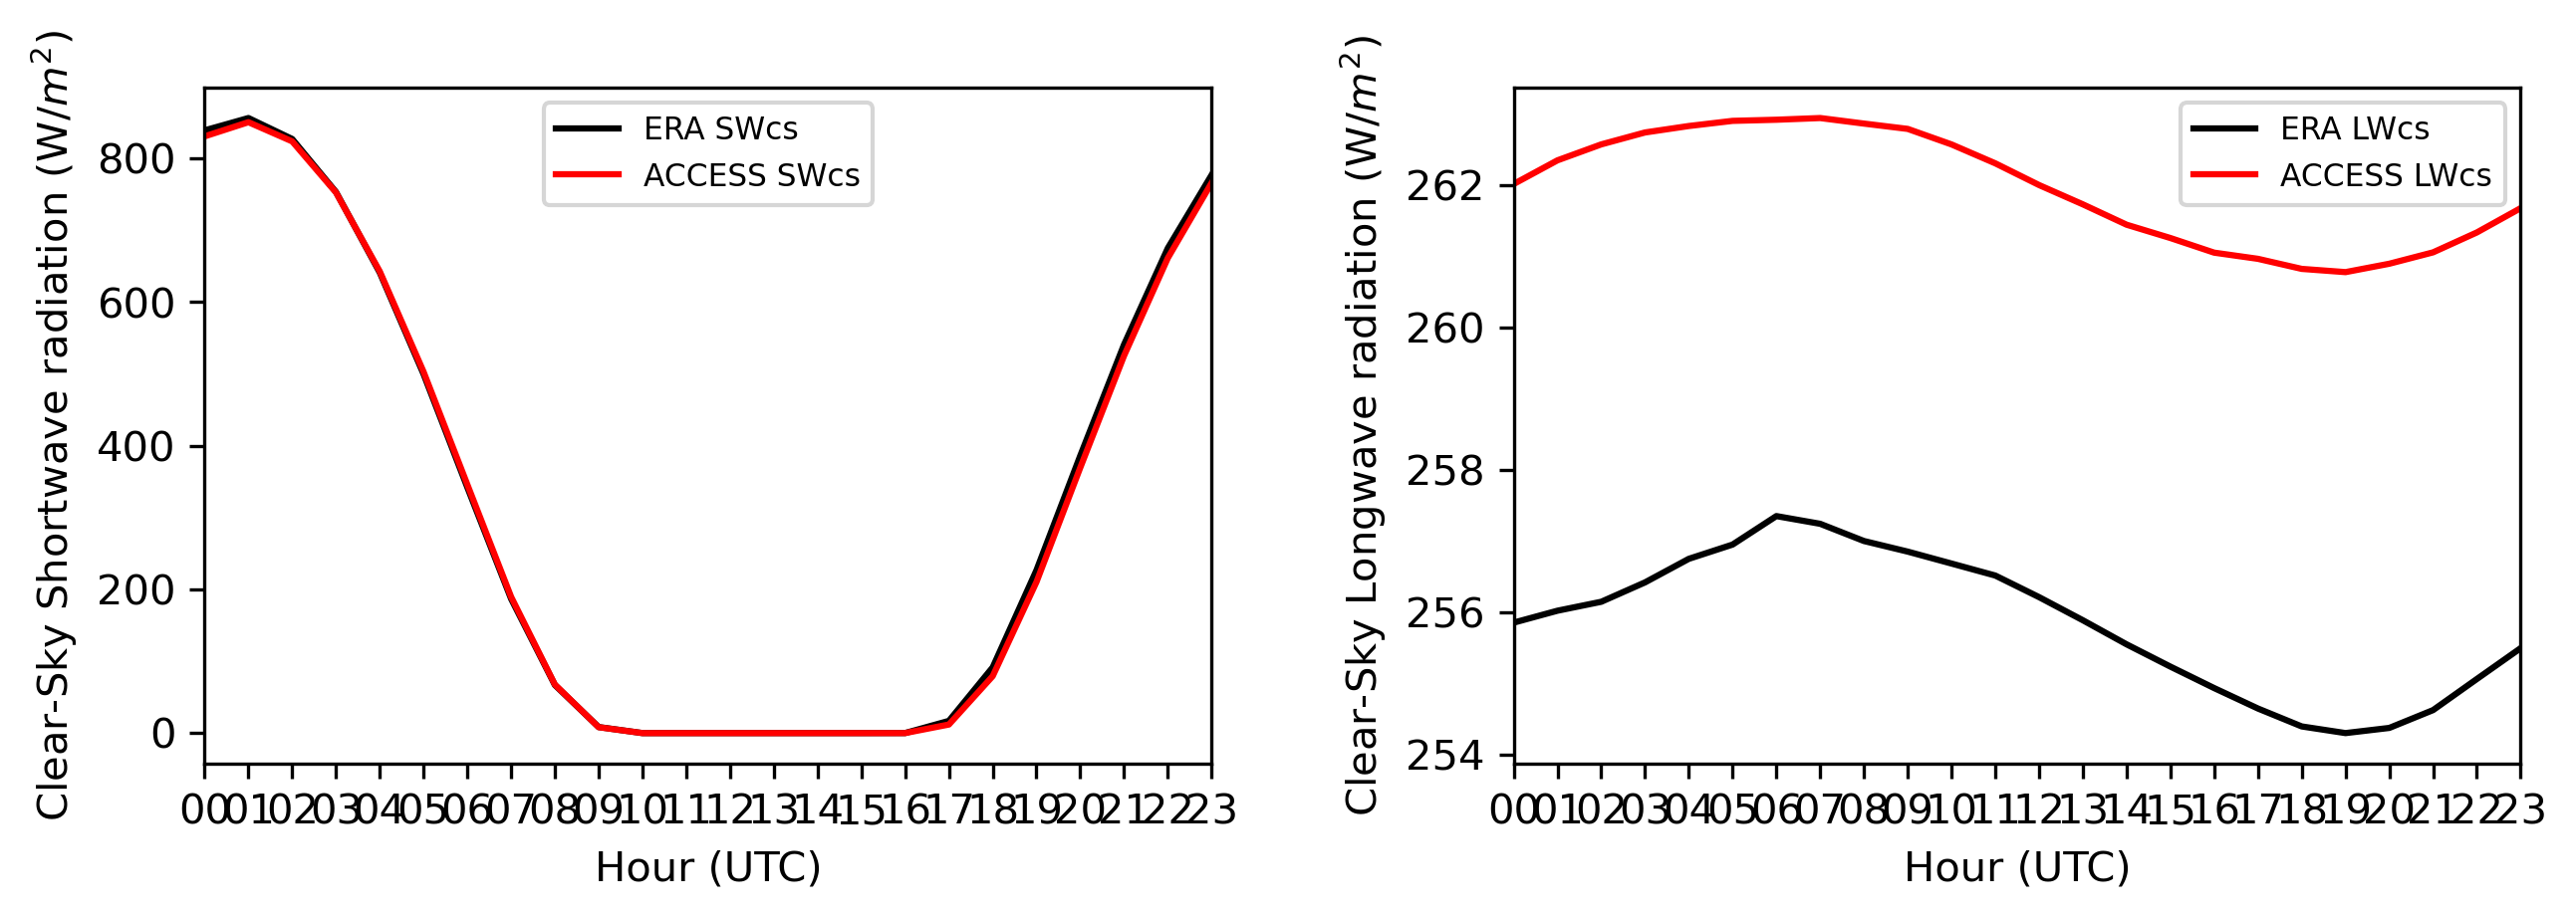

In [24]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)

ax1 = plt.subplot(121,)
ax1.plot(df1.index, df1['ERA SWcs shifted'], label='ERA SWcs',color='black');
ax1.plot(df.index, df['ACCESS SWcs'],label='ACCESS SWcs',color='red');
#ax1.fill_between(x,hourly_obs_SWCRE_5th,hourly_obs_SWCRE_95th,color='black',alpha=0.1)
#ax1.fill_between(x,pd_ACCESS_SWCRE_5th,pd_ACCESS_SWCRE_95th,color='red',alpha=0.1)
#x_minor_locator = MultipleLocator(1)
#ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Clear-Sky Shortwave radiation (W/$m^{2}$)')
plt.xlim(0,23)
#plt.ylim(-900,400)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
ax2.plot(df1.index, df1['ERA LWcs shifted'], label='ERA LWcs',color='black');
ax2.plot(df.index, df['ACCESS LWcs'],label='ACCESS LWcs',color='red');
#ax1.fill_between(x,hourly_obs_SWCRE_5th,hourly_obs_SWCRE_95th,color='black',alpha=0.1)
#ax1.fill_between(x,pd_ACCESS_SWCRE_5th,pd_ACCESS_SWCRE_95th,color='red',alpha=0.1)
#x_minor_locator = MultipleLocator(1)
#ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Clear-Sky Longwave radiation (W/$m^{2}$)')
plt.xlim(0,23)
#plt.ylim(-900,400)
plt.legend(fontsize=7.5);

In [26]:
era_SWcs = pd.DataFrame(era_SWcs,index=era_SWcs.index)
era_LWcs = pd.DataFrame(era_LWcs,index=era_LWcs.index)

era_SWcs = era_SWcs.set_index(pd.to_datetime(era_SWcs.index.values) + pd.Timedelta(minutes = 20))
era_LWcs = era_LWcs.set_index(pd.to_datetime(era_LWcs.index.values) + pd.Timedelta(minutes = 20))

In [27]:
era_radiation = pd.concat([era_SWcs, era_LWcs], axis=1)

In [28]:
era_radiation['ERA SWcs shifted'] = np.zeros(3624)
era_radiation['ERA LWcs shifted'] = np.zeros(3624)

In [29]:
era_radiation

,ERA SWcs,ERA LWcs,ERA SWcs shifted,ERA LWcs shifted
2017-10-01 00:20:00,574.578735,243.515244,0.0,0.0
2017-10-01 01:20:00,635.048645,242.249084,0.0,0.0
2017-10-01 02:20:00,647.308533,242.471085,0.0,0.0
2017-10-01 03:20:00,609.369080,244.214233,0.0,0.0
2017-10-01 04:20:00,528.015320,244.720718,0.0,0.0
...,...,...,...,...
2018-02-28 19:20:00,0.501852,250.405151,0.0,0.0
2018-02-28 20:20:00,66.593491,250.368607,0.0,0.0
2018-02-28 21:20:00,215.056519,250.491638,0.0,0.0
2018-02-28 22:20:00,373.977264,250.993179,0.0,0.0


In [30]:
for row in np.arange(3624):
    if row < 3623:
        era_radiation['ERA SWcs shifted'][row] = era_radiation['ERA SWcs'][row + 1]
        era_radiation['ERA LWcs shifted'][row] = era_radiation['ERA LWcs'][row + 1]
    else:
        era_radiation['ERA SWcs shifted'][row] = era_radiation['ERA SWcs'][0]
        era_radiation['ERA LWcs shifted'][row] = era_radiation['ERA LWcs'][0]

<ipython-input-30-e9fd813cc6d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_radiation['ERA SWcs shifted'][row] = era_radiation['ERA SWcs'][row + 1]
<ipython-input-30-e9fd813cc6d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_radiation['ERA LWcs shifted'][row] = era_radiation['ERA LWcs'][row + 1]
<ipython-input-30-e9fd813cc6d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_radiation['ERA SWcs shifted'][row] = era

In [31]:
data20minSW = []
data20minLW = []
for i in range(217440):
    crt_time = str(daily_obs_SW.index[i])
    if crt_time[14:16] == '20':
        data20minSW.append(daily_obs_SW[i]) 
        data20minLW.append(daily_obs_LW[i]) 

In [32]:
Spot_time = pd.Series(dtype='float64',name='Spot_Time')

for Year in Years:
    for Month in Months:
            if (Year == 17) and (Month < 10):
                continue
            elif (Year == 18) and (Month > 2):
                continue
            else:
                if (Month == 1) or (Month == 10) or (Month == 12):
                    for Day in Days31:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)
                
                elif (Month == 11):    
                    for Day in Days30:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)
                
                else:
                    for Day in Days28:
                        for Hour in Hours:
                            newtime = '20' + str(Year) + '-' + str(Month).rjust(2,'0') + '-' + str(Day).rjust(2,'0') + ' ' + str(Hour).rjust(2,'0') + ':' + '20' + ':' + '00'
                            newtime = pd.Series(newtime,name='newtime')
                            Spot_time = pd.concat([Spot_time, newtime], axis=0)

In [33]:
Spot_times = pd.DatetimeIndex(Spot_time)

In [34]:
hourly_obs_SW = pd.Series(data20minSW, name='Hourly SW')
hourly_obs_LW = pd.Series(data20minLW, name='Hourly LW')

hourly_obs_SW.index = Spot_times
hourly_obs_LW.index = Spot_times

In [35]:
hourly_obs_SW

2017-10-01 00:20:00    165.440953
2017-10-01 01:20:00    319.877790
2017-10-01 02:20:00    200.739870
2017-10-01 03:20:00    309.803359
2017-10-01 04:20:00    114.213651
                          ...    
2018-02-28 19:20:00     19.077660
2018-02-28 20:20:00    204.667931
2018-02-28 21:20:00    336.890358
2018-02-28 22:20:00    410.457746
2018-02-28 23:20:00    651.020152
Name: Hourly SW, Length: 3624, dtype: float64

In [36]:
hourly_data = pd.concat([hourly_obs_SW, hourly_obs_LW, era_radiation], axis=1)

In [37]:
hourly_data

,Hourly SW,Hourly LW,ERA SWcs,ERA LWcs,ERA SWcs shifted,ERA LWcs shifted
2017-10-01 00:20:00,165.440953,311.017046,574.578735,243.515244,635.048645,242.249084
2017-10-01 01:20:00,319.877790,314.745875,635.048645,242.249084,647.308533,242.471085
2017-10-01 02:20:00,200.739870,321.893031,647.308533,242.471085,609.369080,244.214233
2017-10-01 03:20:00,309.803359,318.519466,609.369080,244.214233,528.015320,244.720718
2017-10-01 04:20:00,114.213651,318.561151,528.015320,244.720718,413.429474,240.284439
...,...,...,...,...,...,...
2018-02-28 19:20:00,19.077660,263.235581,0.501852,250.405151,66.593491,250.368607
2018-02-28 20:20:00,204.667931,272.118905,66.593491,250.368607,215.056519,250.491638
2018-02-28 21:20:00,336.890358,262.797450,215.056519,250.491638,373.977264,250.993179
2018-02-28 22:20:00,410.457746,270.749217,373.977264,250.993179,517.448547,251.758148


In [38]:
hourly_data['CRE'] = (1-0.055)*(hourly_data['Hourly SW']-hourly_data['ERA SWcs shifted']) + 0.97*(hourly_data['Hourly LW']-hourly_data['ERA LWcs shifted'])

In [39]:
hourly_data['SW_CRE'] = (1-0.055)*(hourly_data['Hourly SW']-hourly_data['ERA SWcs shifted'])
hourly_data['LW_CRE'] = 0.97*(hourly_data['Hourly LW']-hourly_data['ERA LWcs shifted'])

In [40]:
hourly_data

,Hourly SW,Hourly LW,ERA SWcs,ERA LWcs,ERA SWcs shifted,ERA LWcs shifted,CRE,SW_CRE,LW_CRE
2017-10-01 00:20:00,165.440953,311.017046,574.578735,243.515244,635.048645,242.249084,-377.074346,-443.779269,66.704923
2017-10-01 01:20:00,319.877790,314.745875,635.048645,242.249084,647.308533,242.471085,-239.315506,-309.422052,70.106546
2017-10-01 02:20:00,200.739870,321.893031,647.308533,242.471085,609.369080,244.214233,-310.806169,-386.154603,75.348434
2017-10-01 03:20:00,309.803359,318.519466,609.369080,244.214233,528.015320,244.720718,-134.625518,-206.210303,71.584785
2017-10-01 04:20:00,114.213651,318.561151,528.015320,244.720718,413.429474,240.284439,-206.830542,-282.758952,75.928410
...,...,...,...,...,...,...,...,...,...
2018-02-28 19:20:00,19.077660,263.235581,0.501852,250.405151,66.593491,250.368607,-32.421495,-44.902460,12.480966
2018-02-28 20:20:00,204.667931,272.118905,66.593491,250.368607,215.056519,250.491638,11.161233,-9.817216,20.978449
2018-02-28 21:20:00,336.890358,262.797450,215.056519,250.491638,373.977264,250.993179,-23.596985,-35.047127,11.450142
2018-02-28 22:20:00,410.457746,270.749217,373.977264,250.993179,517.448547,251.758148,-82.684970,-101.106307,18.421336


In [41]:
hourly_obs_CRE = pd.Series(hourly_data.CRE.dropna(), name='Hourly CRE')
hourly_obs_SWCRE = pd.Series(hourly_data.SW_CRE.dropna(), name='Hourly SW CRE')
hourly_obs_LWCRE = pd.Series(hourly_data.LW_CRE.dropna(), name='Hourly LW CRE')

In [42]:
hourly_obs_CRE

2017-10-01 00:20:00   -377.074346
2017-10-01 01:20:00   -239.315506
2017-10-01 02:20:00   -310.806169
2017-10-01 03:20:00   -134.625518
2017-10-01 04:20:00   -206.830542
                          ...    
2018-02-28 19:20:00    -32.421495
2018-02-28 20:20:00     11.161233
2018-02-28 21:20:00    -23.596985
2018-02-28 22:20:00    -82.684970
2018-02-28 23:20:00     95.770717
Name: Hourly CRE, Length: 3624, dtype: float64

In [43]:
hourly_obs_SWCRE

2017-10-01 00:20:00   -443.779269
2017-10-01 01:20:00   -309.422052
2017-10-01 02:20:00   -386.154603
2017-10-01 03:20:00   -206.210303
2017-10-01 04:20:00   -282.758952
                          ...    
2018-02-28 19:20:00    -44.902460
2018-02-28 20:20:00     -9.817216
2018-02-28 21:20:00    -35.047127
2018-02-28 22:20:00   -101.106307
2018-02-28 23:20:00     72.237138
Name: Hourly SW CRE, Length: 3624, dtype: float64

In [44]:
hourly_obs_LWCRE

2017-10-01 00:20:00    66.704923
2017-10-01 01:20:00    70.106546
2017-10-01 02:20:00    75.348434
2017-10-01 03:20:00    71.584785
2017-10-01 04:20:00    75.928410
                         ...    
2018-02-28 19:20:00    12.480966
2018-02-28 20:20:00    20.978449
2018-02-28 21:20:00    11.450142
2018-02-28 22:20:00    18.421336
2018-02-28 23:20:00    23.533579
Name: Hourly LW CRE, Length: 3624, dtype: float64

In [45]:
hourly_obs = pd.concat([hourly_obs_CRE,hourly_obs_SWCRE,hourly_obs_LWCRE], axis=1)

In [46]:
hourly_obs

,Hourly CRE,Hourly SW CRE,Hourly LW CRE
2017-10-01 00:20:00,-377.074346,-443.779269,66.704923
2017-10-01 01:20:00,-239.315506,-309.422052,70.106546
2017-10-01 02:20:00,-310.806169,-386.154603,75.348434
2017-10-01 03:20:00,-134.625518,-206.210303,71.584785
2017-10-01 04:20:00,-206.830542,-282.758952,75.928410
...,...,...,...
2018-02-28 19:20:00,-32.421495,-44.902460,12.480966
2018-02-28 20:20:00,11.161233,-9.817216,20.978449
2018-02-28 21:20:00,-23.596985,-35.047127,11.450142
2018-02-28 22:20:00,-82.684970,-101.106307,18.421336


In [47]:
hourly_obs['Hour'] = hourly_obs.index.map(lambda x: x.strftime("%H"))

df = hourly_obs.groupby('Hour').mean()

In [48]:
df

,Hourly CRE,Hourly SW CRE,Hourly LW CRE
Hour,,,
00,-292.557547,-348.929884,56.372337
01,-317.667492,-372.893407,55.225915
02,-271.346007,-324.942192,53.596185
03,-258.804149,-313.360126,54.555977
04,-233.566223,-290.684078,57.117855
05,-172.180374,-227.834402,55.654028
06,-110.612749,-167.369969,56.757221
07,-33.319911,-90.725680,57.405769
08,20.740887,-34.687579,55.428466


In [49]:
pd_ACCESS_CRE = pd.Series(pd_ACCESS_CRE, name = 'Hourly ACCESS CRE')
pd_ACCESS_SWCRE = pd.Series(pd_ACCESS_SWCRE, name = 'Hourly ACCESS SWCRE')
pd_ACCESS_LWCRE = pd.Series(pd_ACCESS_LWCRE, name = 'Hourly ACCESS LWCRE')

In [50]:
hourly_access = pd.concat([pd_ACCESS_CRE,pd_ACCESS_SWCRE,pd_ACCESS_LWCRE], axis=1)

In [51]:
hourly_access.index = hourly_obs.index

In [52]:
hourly_access

,Hourly ACCESS CRE,Hourly ACCESS SWCRE,Hourly ACCESS LWCRE
2017-10-01 00:20:00,-426.934833,-496.123127,69.188294
2017-10-01 01:20:00,-353.749628,-421.392342,67.642714
2017-10-01 02:20:00,-415.169153,-484.744790,69.575637
2017-10-01 03:20:00,-229.485583,-294.045175,64.559592
2017-10-01 04:20:00,-176.817922,-228.098795,51.280873
...,...,...,...
2018-02-28 19:20:00,31.263057,-25.959529,57.222586
2018-02-28 20:20:00,-32.715257,-56.777693,24.062436
2018-02-28 21:20:00,-92.388539,-115.194735,22.806196
2018-02-28 22:20:00,-52.112777,-100.109326,47.996549


In [53]:
hourly_data = pd.concat([hourly_access,hourly_obs], axis=1)

In [54]:
hourly_data['CRE bias'] = hourly_data['Hourly ACCESS CRE'] - hourly_data['Hourly CRE']
hourly_data['SWCRE bias'] = hourly_data['Hourly ACCESS SWCRE'] - hourly_data['Hourly SW CRE']
hourly_data['LWCRE bias'] = hourly_data['Hourly ACCESS LWCRE'] - hourly_data['Hourly LW CRE']

In [55]:
hourly_data

,Hourly ACCESS CRE,Hourly ACCESS SWCRE,Hourly ACCESS LWCRE,Hourly CRE,Hourly SW CRE,Hourly LW CRE,Hour,CRE bias,SWCRE bias,LWCRE bias
2017-10-01 00:20:00,-426.934833,-496.123127,69.188294,-377.074346,-443.779269,66.704923,00,-49.860487,-52.343858,2.483372
2017-10-01 01:20:00,-353.749628,-421.392342,67.642714,-239.315506,-309.422052,70.106546,01,-114.434123,-111.970290,-2.463832
2017-10-01 02:20:00,-415.169153,-484.744790,69.575637,-310.806169,-386.154603,75.348434,02,-104.362984,-98.590187,-5.772797
2017-10-01 03:20:00,-229.485583,-294.045175,64.559592,-134.625518,-206.210303,71.584785,03,-94.860065,-87.834872,-7.025193
2017-10-01 04:20:00,-176.817922,-228.098795,51.280873,-206.830542,-282.758952,75.928410,04,30.012620,54.660157,-24.647537
...,...,...,...,...,...,...,...,...,...,...
2018-02-28 19:20:00,31.263057,-25.959529,57.222586,-32.421495,-44.902460,12.480966,19,63.684551,18.942931,44.741620
2018-02-28 20:20:00,-32.715257,-56.777693,24.062436,11.161233,-9.817216,20.978449,20,-43.876490,-46.960478,3.083988
2018-02-28 21:20:00,-92.388539,-115.194735,22.806196,-23.596985,-35.047127,11.450142,21,-68.791554,-80.147608,11.356054
2018-02-28 22:20:00,-52.112777,-100.109326,47.996549,-82.684970,-101.106307,18.421336,22,30.572193,0.996981,29.575213


In [56]:
hourly_data['Hour'] = hourly_data.index.map(lambda x: x.strftime("%H"))

df3 = hourly_data.groupby('Hour').mean()

In [57]:
df3

,Hourly ACCESS CRE,Hourly ACCESS SWCRE,Hourly ACCESS LWCRE,Hourly CRE,Hourly SW CRE,Hourly LW CRE,CRE bias,SWCRE bias,LWCRE bias
Hour,,,,,,,,,
00,-268.953764,-320.070449,51.116684,-292.557547,-348.929884,56.372337,23.603783,28.859436,-5.255653
01,-260.557127,-312.163435,51.606308,-317.667492,-372.893407,55.225915,57.110365,60.729973,-3.619608
02,-242.125235,-292.624262,50.499027,-271.346007,-324.942192,53.596185,29.220772,32.317930,-3.097158
03,-239.133508,-289.831026,50.697518,-258.804149,-313.360126,54.555977,19.670641,23.529101,-3.858459
04,-211.566093,-260.821887,49.255793,-233.566223,-290.684078,57.117855,22.000129,29.862191,-7.862062
05,-153.401034,-203.305597,49.904563,-172.180374,-227.834402,55.654028,18.779340,24.528805,-5.749464
06,-95.689466,-145.599436,49.909969,-110.612749,-167.369969,56.757221,14.923282,21.770534,-6.847251
07,-34.944881,-84.502268,49.557387,-33.319911,-90.725680,57.405769,-1.624970,6.223412,-7.848382
08,20.249874,-29.865477,50.115351,20.740887,-34.687579,55.428466,-0.491012,4.822103,-5.313115


In [58]:
hourly_access['Hour'] = hourly_access.index.map(lambda x: x.strftime("%H"))

df1 = hourly_access.groupby('Hour').mean()

In [59]:
df1

,Hourly ACCESS CRE,Hourly ACCESS SWCRE,Hourly ACCESS LWCRE
Hour,,,
00,-268.953764,-320.070449,51.116684
01,-260.557127,-312.163435,51.606308
02,-242.125235,-292.624262,50.499027
03,-239.133508,-289.831026,50.697518
04,-211.566093,-260.821887,49.255793
05,-153.401034,-203.305597,49.904563
06,-95.689466,-145.599436,49.909969
07,-34.944881,-84.502268,49.557387
08,20.249874,-29.865477,50.115351


In [60]:
df2 = pd.concat([df, df1], axis=1)

In [61]:
df2['CRE bias'] = df2['Hourly ACCESS CRE'] - df2['Hourly CRE']
df2['SWCRE bias'] = df2['Hourly ACCESS SWCRE'] - df2['Hourly SW CRE']
df2['LWCRE bias'] = df2['Hourly ACCESS LWCRE'] - df2['Hourly LW CRE']

In [62]:
from scipy.stats import t

In [64]:
df3_std = hourly_data.groupby('Hour').std()

In [66]:
t_crit = np.abs(t.ppf((1-0.95)/2,150))

In [69]:
CERES = xr.open_dataset('/Users/peizhangcheng/Downloads/CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20170901-20180228.nc')
CERES = CERES.interp(lat=-54.4996, lon=158.9437)

In [73]:
CERES_CRE = (1-0.055)*(CERES.ini_sfc_sw_down_all_1h-CERES.ini_sfc_sw_down_clr_1h)+0.97*(CERES.ini_sfc_lw_down_all_1h-CERES.ini_sfc_lw_down_clr_1h)
CERES_SWCRE = (1-0.055)*(CERES.ini_sfc_sw_down_all_1h-CERES.ini_sfc_sw_down_clr_1h)
CERES_LWCRE = 0.97*(CERES.ini_sfc_lw_down_all_1h-CERES.ini_sfc_lw_down_clr_1h)

In [84]:
CRE_mean = CERES_CRE.groupby(CERES_CRE.time.dt.hour).mean().values
CRE_std = CERES_CRE.groupby(CERES_CRE.time.dt.hour).std().values

SWCRE_mean = CERES_SWCRE.groupby(CERES_SWCRE.time.dt.hour).mean().values
SWCRE_std = CERES_SWCRE.groupby(CERES_SWCRE.time.dt.hour).std().values

LWCRE_mean = CERES_LWCRE.groupby(CERES_LWCRE.time.dt.hour).mean().values
LWCRE_std = CERES_LWCRE.groupby(CERES_LWCRE.time.dt.hour).std().values

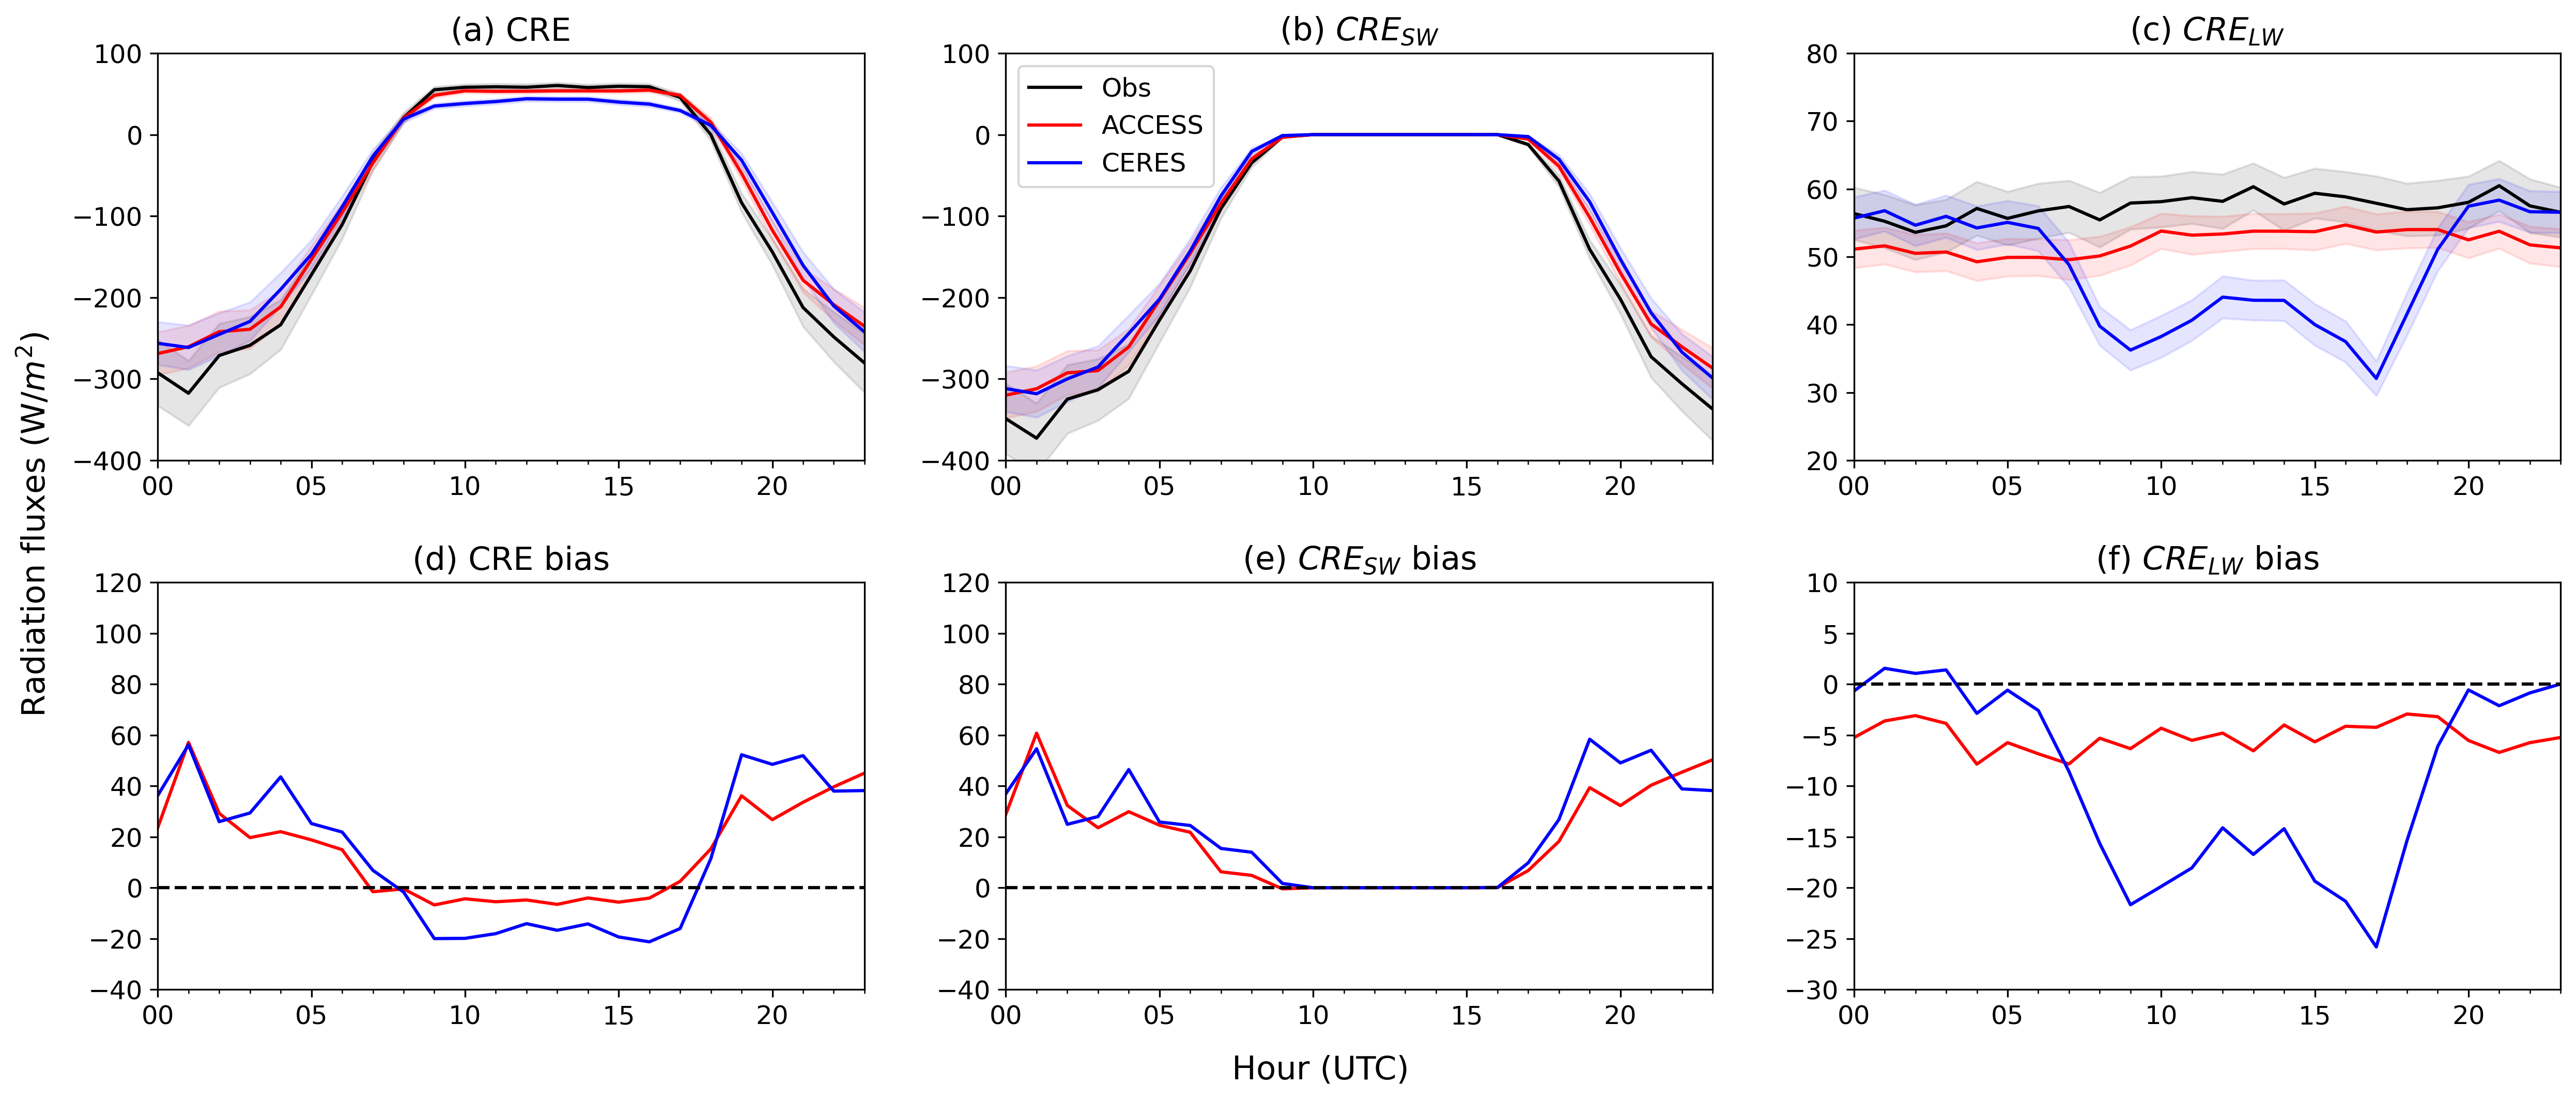

In [110]:
fig = plt.figure(figsize=(20,8),dpi=300)
plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.06, 'Hour (UTC)', ha='center', va='center',fontsize=15)
fig.text(0.085, 0.5, 'Radiation fluxes (W/$m^{2}$)', ha='center', va='center', rotation='vertical',fontsize=15)

ax1 = plt.subplot(231)
ax1.plot(df.index, df['Hourly CRE'], label='Obs',color='black');
ax1.plot(df1.index, df1['Hourly ACCESS CRE'], label='ACCESS',color='red');
ax1.plot(df1.index,CRE_mean,label='CERES', color='blue')
ax1.fill_between(df.index,df['Hourly CRE'] - df3_std['Hourly CRE']*t_crit/np.sqrt(151),df['Hourly CRE'] + df3_std['Hourly CRE']*t_crit/np.sqrt(151),color='black',alpha=0.1)
ax1.fill_between(df1.index,df1['Hourly ACCESS CRE'] - df3_std['Hourly ACCESS CRE']*t_crit/np.sqrt(151),df1['Hourly ACCESS CRE'] + df3_std['Hourly ACCESS CRE']*t_crit/np.sqrt(151),color='red',alpha=0.1)
ax1.fill_between(df1.index,CRE_mean - CRE_std*t_crit/np.sqrt(151),CRE_mean + CRE_std*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlim(0,23)
plt.ylim(-400,100)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(fontsize=12);
plt.title('(a) CRE',fontsize=15)

ax2 = plt.subplot(232,)
ax2.plot(df.index, df['Hourly SW CRE'], label='Obs',color='black');
ax2.plot(df1.index, df1['Hourly ACCESS SWCRE'], label='ACCESS',color='red');
ax2.plot(df1.index,SWCRE_mean,label='CERES', color='blue')
ax2.fill_between(df.index,df['Hourly SW CRE'] - df3_std['Hourly SW CRE']*t_crit/np.sqrt(151),df['Hourly SW CRE'] + df3_std['Hourly SW CRE']*t_crit/np.sqrt(151),color='black',alpha=0.1)
ax2.fill_between(df1.index,df1['Hourly ACCESS SWCRE'] - df3_std['Hourly ACCESS SWCRE']*t_crit/np.sqrt(151),df1['Hourly ACCESS SWCRE'] + df3_std['Hourly ACCESS SWCRE']*t_crit/np.sqrt(151),color='red',alpha=0.1)
ax2.fill_between(df1.index,SWCRE_mean - SWCRE_std*t_crit/np.sqrt(151),SWCRE_mean + SWCRE_std*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.xlim(0,23)
plt.ylim(-400,100)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left');
plt.title('(b) $CRE_{SW}$',fontsize=15)

ax3 = plt.subplot(233,)
ax3.plot(df.index, df['Hourly LW CRE'], label='Obs',color='black');
ax3.plot(df1.index, df1['Hourly ACCESS LWCRE'], label='ACCESS',color='red');
ax3.plot(df1.index,LWCRE_mean,label='CERES', color='blue')
ax3.fill_between(df.index,df['Hourly LW CRE'] - df3_std['Hourly LW CRE']*t_crit/np.sqrt(151),df['Hourly LW CRE'] + df3_std['Hourly LW CRE']*t_crit/np.sqrt(151),color='black',alpha=0.1)
ax3.fill_between(df1.index,df1['Hourly ACCESS LWCRE'] - df3_std['Hourly ACCESS LWCRE']*t_crit/np.sqrt(151),df1['Hourly ACCESS LWCRE'] + df3_std['Hourly ACCESS LWCRE']*t_crit/np.sqrt(151),color='red',alpha=0.1)
ax3.fill_between(df1.index,LWCRE_mean - LWCRE_std*t_crit/np.sqrt(151),LWCRE_mean + LWCRE_std*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax3.xaxis.set_minor_locator(x_minor_locator)
plt.xlim(0,23)
plt.ylim(20,80)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(fontsize=12, loc='upper left');
plt.title('(c) $CRE_{LW}$',fontsize=15)

ax4 = plt.subplot(234,)
ax4.plot(df2.index, df2['CRE bias'], label='CRE bias',color='red');
ax4.plot(df2.index, CRE_mean - df2['Hourly CRE'], label='CERES CRE bias',color='blue');
#ax4.fill_between(df.index,df3['CRE bias'] - df3_std['CRE bias']*t_crit/np.sqrt(151),df3['CRE bias'] + df3_std['CRE bias']*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax4.xaxis.set_minor_locator(x_minor_locator)
plt.plot(df2.index,np.zeros(24),"--",color='black')
plt.xlim(0,23)
plt.ylim(-40,120)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
plt.title('(d) CRE bias',fontsize=15)

ax5 = plt.subplot(235,)
ax5.plot(df2.index, df2['SWCRE bias'], label='SWCRE bias',color='red');
ax5.plot(df2.index, SWCRE_mean - df2['Hourly SW CRE'], label='CERES SWCRE bias',color='blue');
#ax5.fill_between(df.index,df3['SWCRE bias'] - df3_std['SWCRE bias']*t_crit/np.sqrt(151),df3['SWCRE bias'] + df3_std['SWCRE bias']*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax5.xaxis.set_minor_locator(x_minor_locator)
plt.plot(df2.index,np.zeros(24),"--",color='black')
plt.xlim(0,23)
plt.ylim(-40,120)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
plt.title('(e) $CRE_{SW}$ bias',fontsize=15)

ax6 = plt.subplot(236,)
ax6.plot(df2.index, df2['LWCRE bias'], label='LWCRE bias',color='red');
ax6.plot(df2.index, LWCRE_mean - df2['Hourly LW CRE'], label='CERES LWCRE bias',color='blue');
#ax6.fill_between(df.index,df3['LWCRE bias'] - df3_std['LWCRE bias']*t_crit/np.sqrt(151),df3['LWCRE bias'] + df3_std['LWCRE bias']*t_crit/np.sqrt(151),color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax6.xaxis.set_minor_locator(x_minor_locator)
plt.plot(df2.index,np.zeros(24),"--",color='black')
plt.xlim(0,23)
plt.ylim(-30,10)
plt.xticks(np.arange(0, 23, step=5),fontsize=12)
plt.yticks(fontsize=12)
plt.title('(f) $CRE_{LW}$ bias',fontsize=15)

#plt.savefig('/Users/peizhangcheng/Desktop/SW&LW_CRE_hourly_bias.jpg')

In [59]:
hour = pd.Series(name='Hour',dtype='string')
hourly_obs_CRE_hour = pd.concat([hourly_obs_CRE,hour],axis=1)
hourly_obs_SWCRE_hour = pd.concat([hourly_obs_SWCRE,hour],axis=1)
hourly_obs_LWCRE_hour = pd.concat([hourly_obs_LWCRE,hour],axis=1)
pd_ACCESS_CRE = pd.Series(pd_ACCESS_CRE,name='Hourly CRE')
pd_ACCESS_CRE_hour = pd.concat([pd_ACCESS_CRE,hour],axis=1)
pd_ACCESS_SWCRE = pd.Series(pd_ACCESS_SWCRE,name='Hourly SWCRE')
pd_ACCESS_SWCRE_hour = pd.concat([pd_ACCESS_SWCRE,hour],axis=1)
pd_ACCESS_LWCRE = pd.Series(pd_ACCESS_LWCRE,name='Hourly LWCRE')
pd_ACCESS_LWCRE_hour = pd.concat([pd_ACCESS_LWCRE,hour],axis=1)

In [60]:
for row in hourly_obs_CRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            hourly_obs_CRE_hour['Hour'][row] = str(i)
            
for row in hourly_obs_SWCRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            hourly_obs_SWCRE_hour['Hour'][row] = str(i)
            
for row in hourly_obs_LWCRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            hourly_obs_LWCRE_hour['Hour'][row] = str(i)

for row in pd_ACCESS_CRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            pd_ACCESS_CRE_hour['Hour'][row] = str(i)
            
for row in pd_ACCESS_SWCRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            pd_ACCESS_SWCRE_hour['Hour'][row] = str(i)
            
for row in pd_ACCESS_LWCRE_hour.index:
    for i in np.arange(24):
        if (str(row)[11:13] == str(i).rjust(2,'0')):
            pd_ACCESS_LWCRE_hour['Hour'][row] = str(i)

In [61]:
hourly_obs_CRE_hour.groupby('Hour').mean()

,Hourly CRE
Hour,
0,-231.479095
1,-299.296915
10,50.149727
11,59.063879
12,58.430349
13,60.554846
14,57.998627
15,59.597256
16,59.057889


In [62]:
hourly_obs_SWCRE_hour.groupby('Hour').mean()

,Hourly SW CRE
Hour,
0,-288.679514
1,-355.188396
10,-8.306579
11,0.021197
12,0.037326
13,0.022746
14,0.036757
15,0.027382
16,0.026669


In [63]:
hourly_obs_LWCRE_hour.groupby('Hour').mean()

,Hourly LW CRE
Hour,
0,57.200419
1,55.891481
10,58.456306
11,59.042681
12,58.393022
13,60.532099
14,57.961870
15,59.569874
16,59.031220


In [64]:
pd_ACCESS_CRE_hour.groupby('Hour').mean()

,Hourly CRE
Hour,
0,-266.878239
1,-260.701131
10,53.752986
11,53.198855
12,53.523710
13,53.941971
14,53.857266
15,53.934168
16,54.709014


In [65]:
pd_ACCESS_SWCRE_hour.groupby('Hour').mean()

,Hourly SWCRE
Hour,
0,-336.725793
1,-330.805244
10,-0.001562
11,0.000000
12,0.000000
13,0.000000
14,0.000000
15,0.000000
16,-0.014647


In [66]:
pd_ACCESS_LWCRE_hour.groupby('Hour').mean()

,Hourly LWCRE
Hour,
0,52.915089
1,53.515284
10,55.416972
11,54.844180
12,55.179082
13,55.610280
14,55.522955
15,55.602235
16,56.415315


In [67]:
names = locals()
for i in np.arange(24):
    names['hourly_obs_CRE_'+str(i).rjust(2,'0')]=list()
    names['hourly_obs_SWCRE_'+str(i).rjust(2,'0')]=list()
    names['hourly_obs_LWCRE_'+str(i).rjust(2,'0')]=list()
    names['pd_ACCESS_CRE_'+str(i).rjust(2,'0')]=list()
    names['pd_ACCESS_SWCRE_'+str(i).rjust(2,'0')]=list()
    names['pd_ACCESS_LWCRE_'+str(i).rjust(2,'0')]=list()

In [68]:
for row in hourly_obs_CRE_hour.index:
    for i in np.arange(24):
        if hourly_obs_CRE_hour['Hour'][row] == str(i):
            names['hourly_obs_CRE_'+str(i).rjust(2,'0')].append(hourly_obs_CRE_hour['Hourly CRE'][row])

for row in hourly_obs_SWCRE_hour.index:
    for i in np.arange(24):
        if hourly_obs_SWCRE_hour['Hour'][row] == str(i):
            names['hourly_obs_SWCRE_'+str(i).rjust(2,'0')].append(hourly_obs_SWCRE_hour['Hourly SW CRE'][row])
            
for row in hourly_obs_LWCRE_hour.index:
    for i in np.arange(24):
        if hourly_obs_LWCRE_hour['Hour'][row] == str(i):
            names['hourly_obs_LWCRE_'+str(i).rjust(2,'0')].append(hourly_obs_LWCRE_hour['Hourly LW CRE'][row])

for row in pd_ACCESS_CRE_hour.index:
    for i in np.arange(24):
        if pd_ACCESS_CRE_hour['Hour'][row] == str(i):
            names['pd_ACCESS_CRE_'+str(i).rjust(2,'0')].append(pd_ACCESS_CRE_hour['Hourly CRE'][row])
            
for row in pd_ACCESS_SWCRE_hour.index:
    for i in np.arange(24):
        if pd_ACCESS_SWCRE_hour['Hour'][row] == str(i):
            names['pd_ACCESS_SWCRE_'+str(i).rjust(2,'0')].append(pd_ACCESS_SWCRE_hour['Hourly SWCRE'][row])
            
for row in pd_ACCESS_LWCRE_hour.index:
    for i in np.arange(24):
        if pd_ACCESS_LWCRE_hour['Hour'][row] == str(i):
            names['pd_ACCESS_LWCRE_'+str(i).rjust(2,'0')].append(pd_ACCESS_LWCRE_hour['Hourly LWCRE'][row])
            

In [69]:
hourly_obs_CRE_5th = []
hourly_obs_SWCRE_5th = []
hourly_obs_LWCRE_5th = []
pd_ACCESS_CRE_5th = []
pd_ACCESS_SWCRE_5th = []
pd_ACCESS_LWCRE_5th = []
hourly_obs_CRE_95th = []
hourly_obs_SWCRE_95th = []
hourly_obs_LWCRE_95th = []
pd_ACCESS_CRE_95th = []
pd_ACCESS_SWCRE_95th = []
pd_ACCESS_LWCRE_95th = []

for i in np.arange(24):
    hourly_obs_CRE_5th.append(np.percentile(names['hourly_obs_CRE_'+str(i).rjust(2,'0')],5))
    hourly_obs_SWCRE_5th.append(np.percentile(names['hourly_obs_SWCRE_'+str(i).rjust(2,'0')],5))
    hourly_obs_LWCRE_5th.append(np.percentile(names['hourly_obs_LWCRE_'+str(i).rjust(2,'0')],5))
    pd_ACCESS_CRE_5th.append(np.percentile(names['pd_ACCESS_CRE_'+str(i).rjust(2,'0')],5))
    pd_ACCESS_SWCRE_5th.append(np.percentile(names['pd_ACCESS_SWCRE_'+str(i).rjust(2,'0')],5))
    pd_ACCESS_LWCRE_5th.append(np.percentile(names['pd_ACCESS_LWCRE_'+str(i).rjust(2,'0')],5))
    hourly_obs_CRE_95th.append(np.percentile(names['hourly_obs_CRE_'+str(i).rjust(2,'0')],95))
    hourly_obs_SWCRE_95th.append(np.percentile(names['hourly_obs_SWCRE_'+str(i).rjust(2,'0')],95))
    hourly_obs_LWCRE_95th.append(np.percentile(names['hourly_obs_LWCRE_'+str(i).rjust(2,'0')],95))
    pd_ACCESS_CRE_95th.append(np.percentile(names['pd_ACCESS_CRE_'+str(i).rjust(2,'0')],95))
    pd_ACCESS_SWCRE_95th.append(np.percentile(names['pd_ACCESS_SWCRE_'+str(i).rjust(2,'0')],95))
    pd_ACCESS_LWCRE_95th.append(np.percentile(names['pd_ACCESS_LWCRE_'+str(i).rjust(2,'0')],95))

In [70]:
hourly_obs_CRE_mean = [-231.479095,-299.296915,-297.046550,-326.745553,-338.356197,-304.976728,-259.396170,-180.185554,-93.728075,-0.845405,50.149727,59.063879,58.430349,60.554846,57.998627,59.597256,59.057889,61.923725,70.482809,44.790119,7.521057,-64.643060,-119.839675,-181.916895]

In [71]:
hourly_obs_SWCRE_mean = [-288.679514,-355.188396,-351.252908,-382.017314,-396.237801,-361.305947,-316.851224,-238.324301,-149.425104,-59.117140,-8.306579,0.021197,0.037326,0.022746,0.036757,0.027382,0.026669,3.835857,13.329842,-13.021937,-51.059700,-125.636377,-177.851090,-239.340033]

In [72]:
hourly_obs_LWCRE_mean = [57.200419,55.891481,54.206358,55.271761,57.88160,56.329219,57.661741,57.802598,55.697029,58.254064,58.456306,59.042681,58.393022,60.532099,57.961870,59.569874,59.031220,58.087868,57.152968,57.585999,58.547072,61.160536,58.360704,57.420328]

In [73]:
pd_ACCESS_CRE_mean = [-266.878239,-260.701131,-243.161533,-239.305244,-211.051753,-154.530099,-96.750081,-35.478519,19.927750,48.306674,53.752986,53.198855,53.523710,53.941971,53.857266,53.934168,54.709014,48.390725,15.315820,-47.235678,-116.457799,-176.640393,-207.010192,-235.090280]

In [74]:
pd_ACCESS_SWCRE_mean = [-336.725793,-330.805244,-310.918865,-307.045986,-275.521835,-216.378512,-155.295665,-90.089988,-32.049531,-3.662313,-0.001562,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014647,-5.876291,-41.160855,-107.293640,-178.926413,-243.900207,-273.948426,-303.331865]

In [75]:
pd_ACCESS_LWCRE_mean = [52.915089,53.515284,52.223500,52.425993,50.841630,51.492366,51.550848,51.192289,51.767584,53.368619,55.416972,54.844180,55.179082,55.610280,55.522955,55.602235,56.415315,55.612185,55.889514,55.831764,54.255320,55.510621,53.475331,53.152920]

In [76]:
hourly_obs_CRE_mean = pd.Series(hourly_obs_CRE_mean,name='Obs CRE Mean')
hourly_obs_SWCRE_mean = pd.Series(hourly_obs_SWCRE_mean,name='Obs SWCRE Mean')
hourly_obs_LWCRE_mean = pd.Series(hourly_obs_LWCRE_mean,name='Obs LWCRE Mean')
pd_ACCESS_CRE_mean = pd.Series(pd_ACCESS_CRE_mean,name='ACCESS CRE Mean')
pd_ACCESS_SWCRE_mean = pd.Series(pd_ACCESS_SWCRE_mean,name='ACCESS SWCRE Mean')
pd_ACCESS_LWCRE_mean = pd.Series(pd_ACCESS_LWCRE_mean,name='ACCESS LWCRE Mean')
hourly_obs_CRE_5th = pd.Series(hourly_obs_CRE_5th,name='Obs CRE 5th')
hourly_obs_SWCRE_5th = pd.Series(hourly_obs_SWCRE_5th,name='Obs SWCRE 5th')
hourly_obs_LWCRE_5th = pd.Series(hourly_obs_LWCRE_5th,name='Obs LWCRE 5th')
pd_ACCESS_CRE_5th = pd.Series(pd_ACCESS_CRE_5th,name='ACCESS CRE 5th')
pd_ACCESS_SWCRE_5th = pd.Series(pd_ACCESS_SWCRE_5th,name='ACCESS SWCRE 5th')
pd_ACCESS_LWCRE_5th = pd.Series(pd_ACCESS_LWCRE_5th,name='ACCESS LWCRE 5th')
hourly_obs_CRE_95th = pd.Series(hourly_obs_CRE_95th,name='Obs CRE 95th')
hourly_obs_SWCRE_95th = pd.Series(hourly_obs_SWCRE_95th,name='Obs SWCRE 95th')
hourly_obs_LWCRE_95th = pd.Series(hourly_obs_LWCRE_95th,name='Obs LWCRE 95th')
pd_ACCESS_CRE_95th = pd.Series(pd_ACCESS_CRE_95th,name='ACCESS CRE 95th')
pd_ACCESS_SWCRE_95th = pd.Series(pd_ACCESS_SWCRE_95th,name='ACCESS SWCRE 95th')
pd_ACCESS_LWCRE_95th = pd.Series(pd_ACCESS_LWCRE_95th,name='ACCESS LWCRE 95th')

In [77]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
hours = pd.Series(hours,name='Hour')

In [78]:
hourly_obs_CRE_mean.index = hours
hourly_obs_SWCRE_mean.index = hours
hourly_obs_LWCRE_mean.index = hours
pd_ACCESS_CRE_mean.index = hours
pd_ACCESS_SWCRE_mean.index = hours
pd_ACCESS_LWCRE_mean.index = hours
hourly_obs_CRE_5th.index = hours
hourly_obs_SWCRE_5th.index = hours
hourly_obs_LWCRE_5th.index = hours
pd_ACCESS_CRE_5th.index = hours
pd_ACCESS_SWCRE_5th.index = hours
pd_ACCESS_LWCRE_5th.index = hours
hourly_obs_CRE_95th.index = hours
hourly_obs_SWCRE_95th.index = hours
hourly_obs_LWCRE_95th.index = hours
pd_ACCESS_CRE_95th.index = hours
pd_ACCESS_SWCRE_95th.index = hours
pd_ACCESS_LWCRE_95th.index = hours

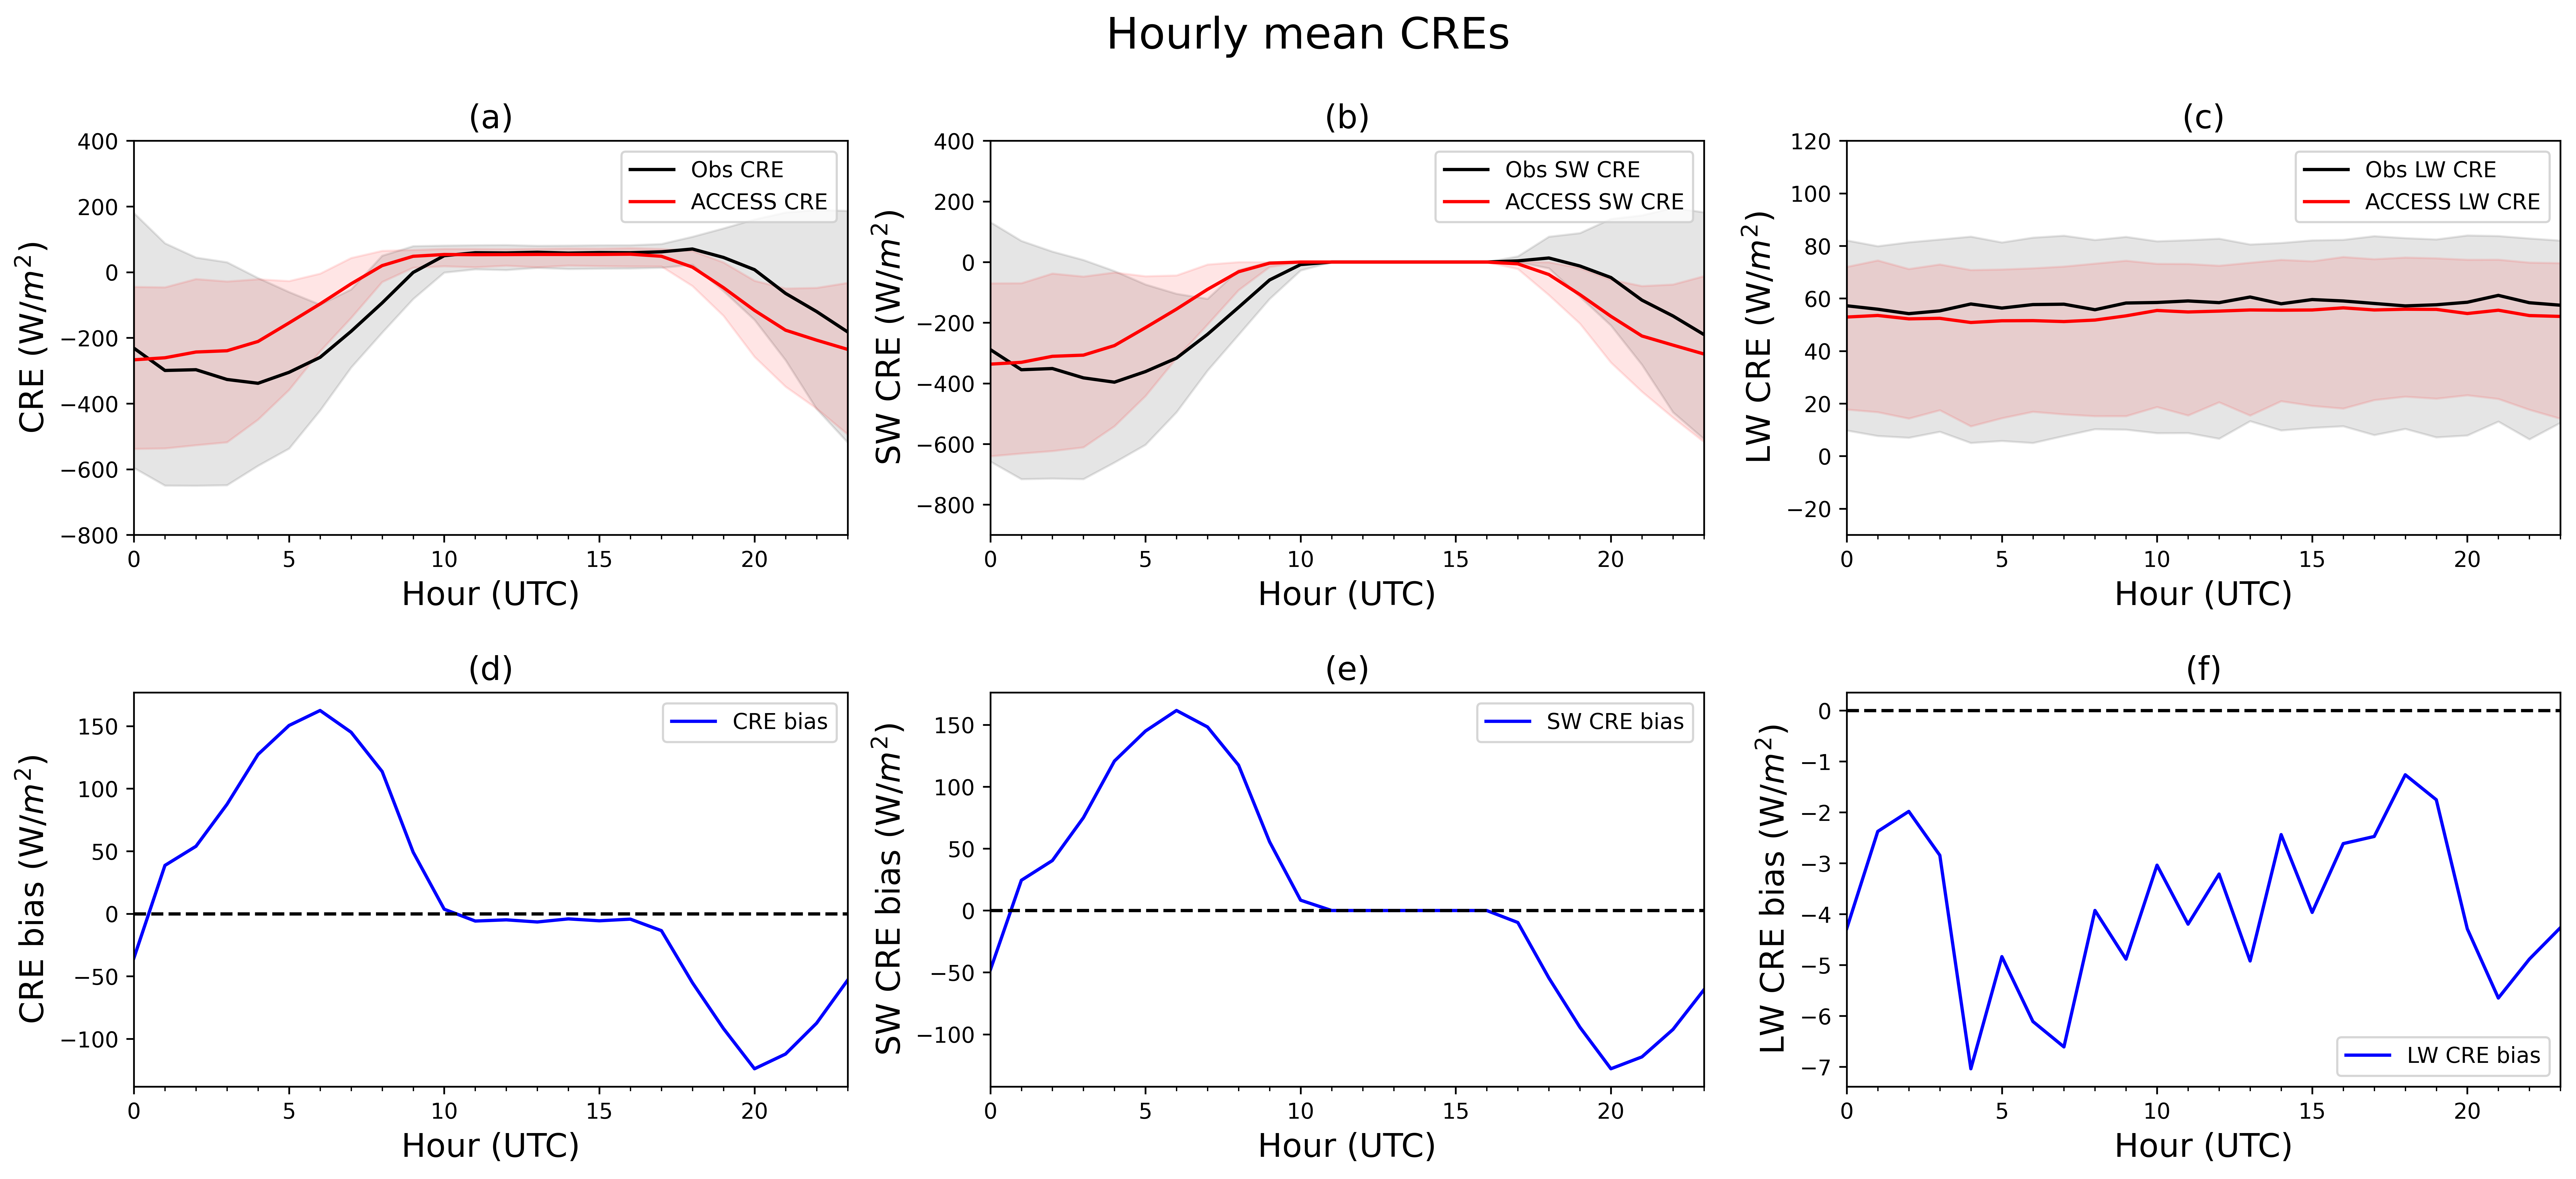

In [90]:
fig = plt.figure(figsize=(20,8),dpi=600)
x = hours
plt.subplots_adjust(hspace=0.4)

ax1 = plt.subplot(231)
hourly_obs_CRE_mean.plot(label='Obs CRE',color='black');
pd_ACCESS_CRE_mean.plot(label='ACCESS CRE',color='red');
ax1.fill_between(x,hourly_obs_CRE_5th,hourly_obs_CRE_95th,color='black',alpha=0.1)
ax1.fill_between(x,pd_ACCESS_CRE_5th,pd_ACCESS_CRE_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('CRE (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.ylim(-800,400)
plt.legend(fontsize=10);
plt.title('(a)',fontsize=15)
plt.suptitle('Hourly mean CREs', fontsize=20)

ax2 = plt.subplot(232,)
hourly_obs_SWCRE_mean.plot(label='Obs SW CRE',color='black');
pd_ACCESS_SWCRE_mean.plot(label='ACCESS SW CRE',color='red');
ax2.fill_between(x,hourly_obs_SWCRE_5th,hourly_obs_SWCRE_95th,color='black',alpha=0.1)
ax2.fill_between(x,pd_ACCESS_SWCRE_5th,pd_ACCESS_SWCRE_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('SW CRE (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.ylim(-900,400)
plt.legend(fontsize=10);
plt.title('(b)',fontsize=15)

ax3 = plt.subplot(233,)
hourly_obs_LWCRE_mean.plot(label='Obs LW CRE',color='black');
pd_ACCESS_LWCRE_mean.plot(label='ACCESS LW CRE',color='red');
ax3.fill_between(x,hourly_obs_LWCRE_5th,hourly_obs_LWCRE_95th,color='black',alpha=0.1)
ax3.fill_between(x,pd_ACCESS_LWCRE_5th,pd_ACCESS_LWCRE_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax3.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('LW CRE (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.ylim(-30,120)
plt.legend(fontsize=10);
plt.title('(c)',fontsize=15)

ax4 = plt.subplot(234,)
bias_hourly_CRE_mean.plot(label='CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax4.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('CRE bias (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.legend(fontsize=10);
plt.title('(d)',fontsize=15)

ax5 = plt.subplot(235,)
bias_hourly_SWCRE_mean.plot(label='SW CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax5.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('SW CRE bias (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.legend(fontsize=10);
plt.title('(e)',fontsize=15)

ax6 = plt.subplot(236,)
bias_hourly_LWCRE_mean.plot(label='LW CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax6.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)', fontsize=15)
plt.ylabel('LW CRE bias (W/$m^{2}$)', fontsize=15)
plt.xlim(0,23)
plt.legend(fontsize=10);
plt.title('(f)',fontsize=15)

#plt.savefig('/Users/peizhangcheng/Desktop/SW&LW_CRE_hourly_bias.jpg')

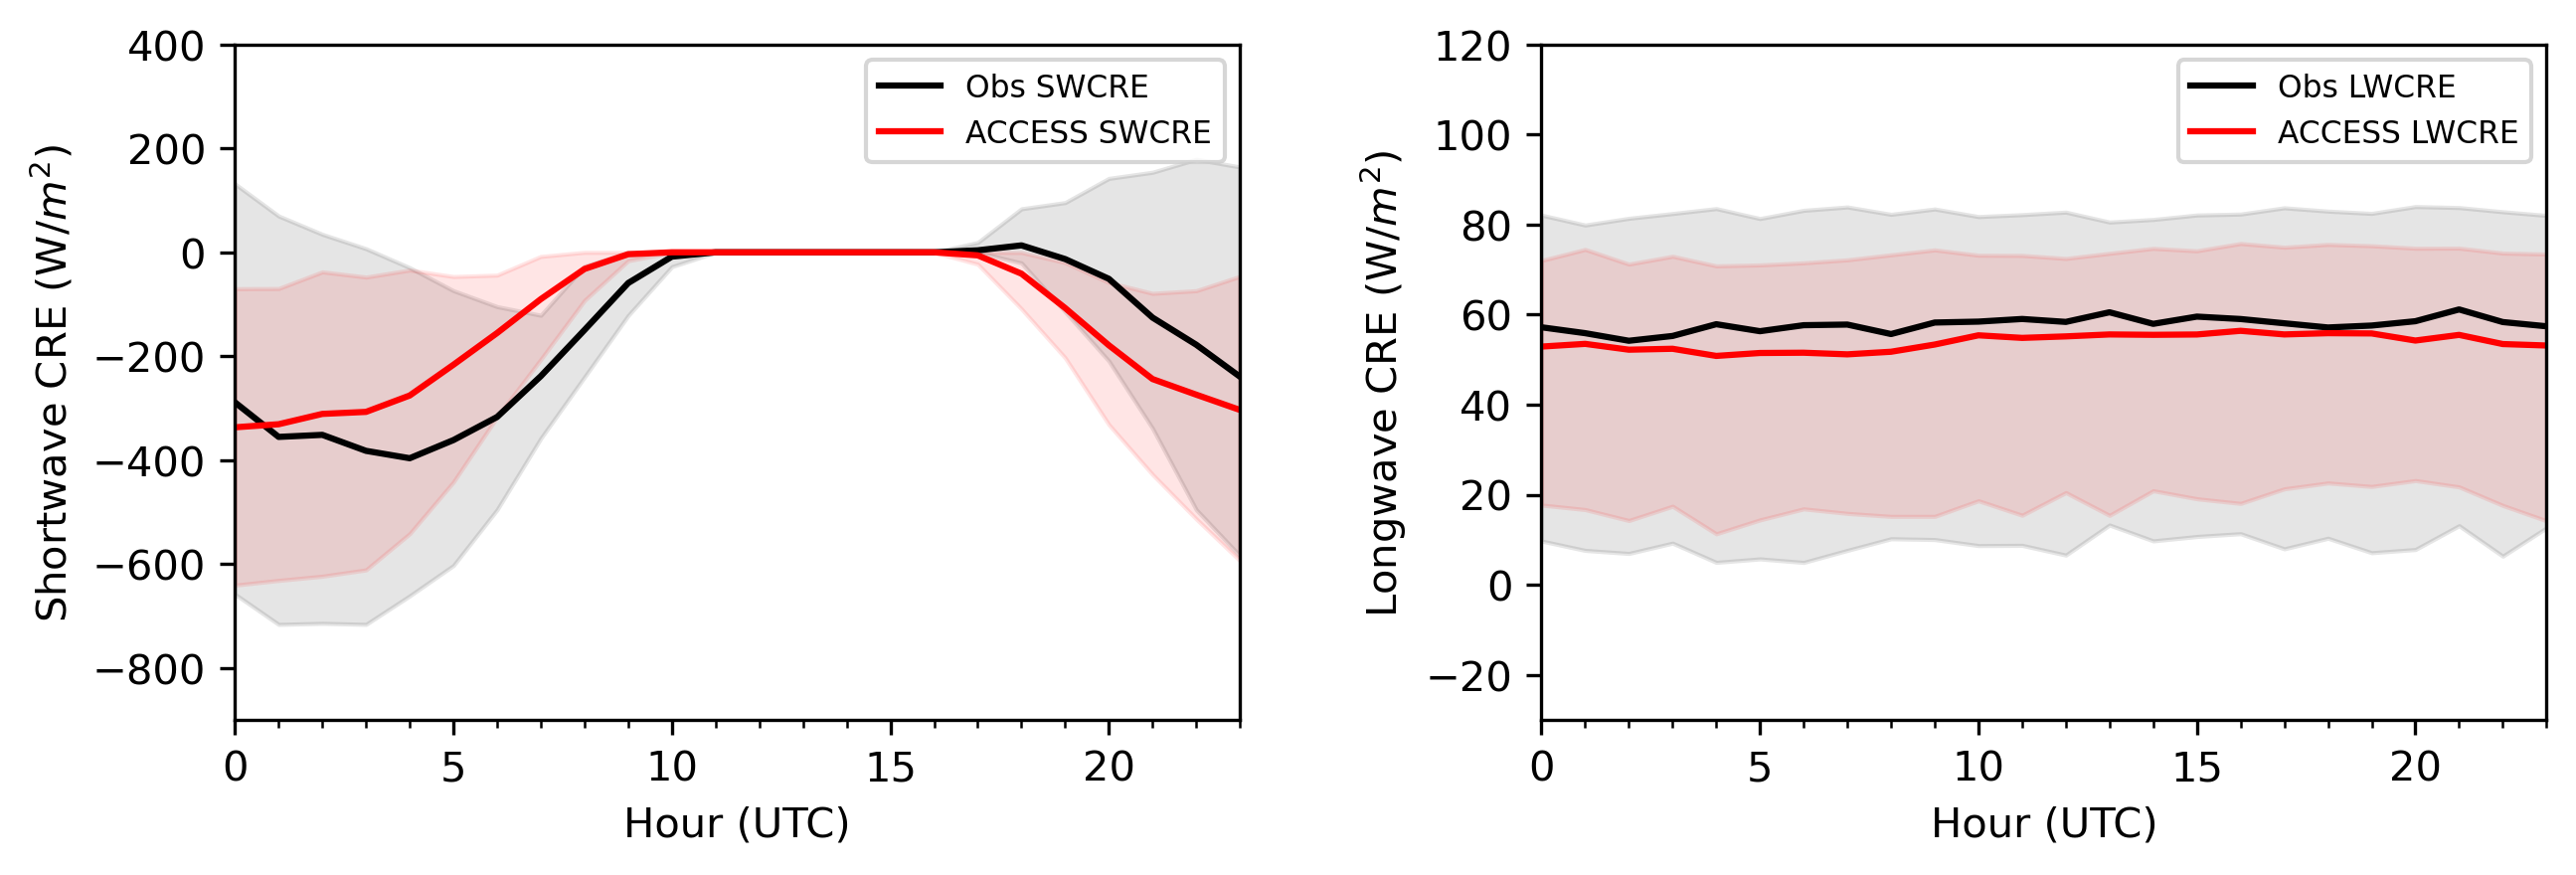

In [79]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)
x = hours

ax1 = plt.subplot(121,)
hourly_obs_SWCRE_mean.plot(label='Obs SWCRE',color='black');
pd_ACCESS_SWCRE_mean.plot(label='ACCESS SWCRE',color='red');
ax1.fill_between(x,hourly_obs_SWCRE_5th,hourly_obs_SWCRE_95th,color='black',alpha=0.1)
ax1.fill_between(x,pd_ACCESS_SWCRE_5th,pd_ACCESS_SWCRE_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Shortwave CRE (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-900,400)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
hourly_obs_LWCRE_mean.plot(label='Obs LWCRE',color='black');
pd_ACCESS_LWCRE_mean.plot(label='ACCESS LWCRE',color='red');
ax2.fill_between(x,hourly_obs_LWCRE_5th,hourly_obs_LWCRE_95th,color='black',alpha=0.1)
ax2.fill_between(x,pd_ACCESS_LWCRE_5th,pd_ACCESS_LWCRE_95th,color='red',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('Longwave CRE (W/$m^{2}$)')
plt.xlim(0,23)
plt.ylim(-30,120)
plt.legend(fontsize=7.5);

In [80]:
for i in np.arange(24):
    names['bias_hourly_CRE_'+str(i).rjust(2,'0')]=np.zeros(151)
    names['bias_hourly_SWCRE_'+str(i).rjust(2,'0')]=np.zeros(151)
    names['bias_hourly_LWCRE_'+str(i).rjust(2,'0')]=np.zeros(151)

In [82]:
bias_hourly_CRE_mean = []
bias_hourly_SWCRE_mean = []
bias_hourly_LWCRE_mean = []
bias_hourly_CRE_5th = []
bias_hourly_SWCRE_5th = []
bias_hourly_LWCRE_5th = []
bias_hourly_CRE_95th = []
bias_hourly_SWCRE_95th = []
bias_hourly_LWCRE_95th = []

for i in np.arange(24):
    for j in np.arange(151):
        names['bias_hourly_CRE_'+str(i).rjust(2,'0')][j] = names['pd_ACCESS_CRE_'+str(i).rjust(2,'0')][j] - names['hourly_obs_CRE_'+str(i).rjust(2,'0')][j]
        names['bias_hourly_SWCRE_'+str(i).rjust(2,'0')][j] = names['pd_ACCESS_SWCRE_'+str(i).rjust(2,'0')][j] - names['hourly_obs_SWCRE_'+str(i).rjust(2,'0')][j]
        names['bias_hourly_LWCRE_'+str(i).rjust(2,'0')][j] = names['pd_ACCESS_LWCRE_'+str(i).rjust(2,'0')][j] - names['hourly_obs_LWCRE_'+str(i).rjust(2,'0')][j]
        
for i in np.arange(24):
    bias_hourly_CRE_mean.append(names['bias_hourly_CRE_'+str(i).rjust(2,'0')].mean())
    bias_hourly_SWCRE_mean.append(names['bias_hourly_SWCRE_'+str(i).rjust(2,'0')].mean())
    bias_hourly_LWCRE_mean.append(names['bias_hourly_LWCRE_'+str(i).rjust(2,'0')].mean())
    bias_hourly_CRE_5th.append(np.percentile(names['bias_hourly_CRE_'+str(i).rjust(2,'0')],5))
    bias_hourly_SWCRE_5th.append(np.percentile(names['bias_hourly_SWCRE_'+str(i).rjust(2,'0')],5))
    bias_hourly_LWCRE_5th.append(np.percentile(names['bias_hourly_LWCRE_'+str(i).rjust(2,'0')],5))
    bias_hourly_CRE_95th.append(np.percentile(names['bias_hourly_CRE_'+str(i).rjust(2,'0')],95))
    bias_hourly_SWCRE_95th.append(np.percentile(names['bias_hourly_SWCRE_'+str(i).rjust(2,'0')],95))
    bias_hourly_LWCRE_95th.append(np.percentile(names['bias_hourly_LWCRE_'+str(i).rjust(2,'0')],95))

In [83]:
bias_hourly_CRE_mean = pd.Series(bias_hourly_CRE_mean,name='Model-Obs CRE Mean')
bias_hourly_SWCRE_mean = pd.Series(bias_hourly_SWCRE_mean,name='Model-Obs SWCRE Mean')
bias_hourly_LWCRE_mean = pd.Series(bias_hourly_LWCRE_mean,name='Model-Obs LWCRE Mean')
bias_hourly_CRE_5th = pd.Series(bias_hourly_CRE_5th,name='Model-Obs CRE 5th')
bias_hourly_CRE_95th = pd.Series(bias_hourly_CRE_95th,name='Model-Obs CRE 95th')

In [84]:
bias_hourly_CRE_mean.index = hours
bias_hourly_SWCRE_mean.index = hours
bias_hourly_LWCRE_mean.index = hours
bias_hourly_CRE_5th.index = hours
bias_hourly_CRE_95th.index = hours

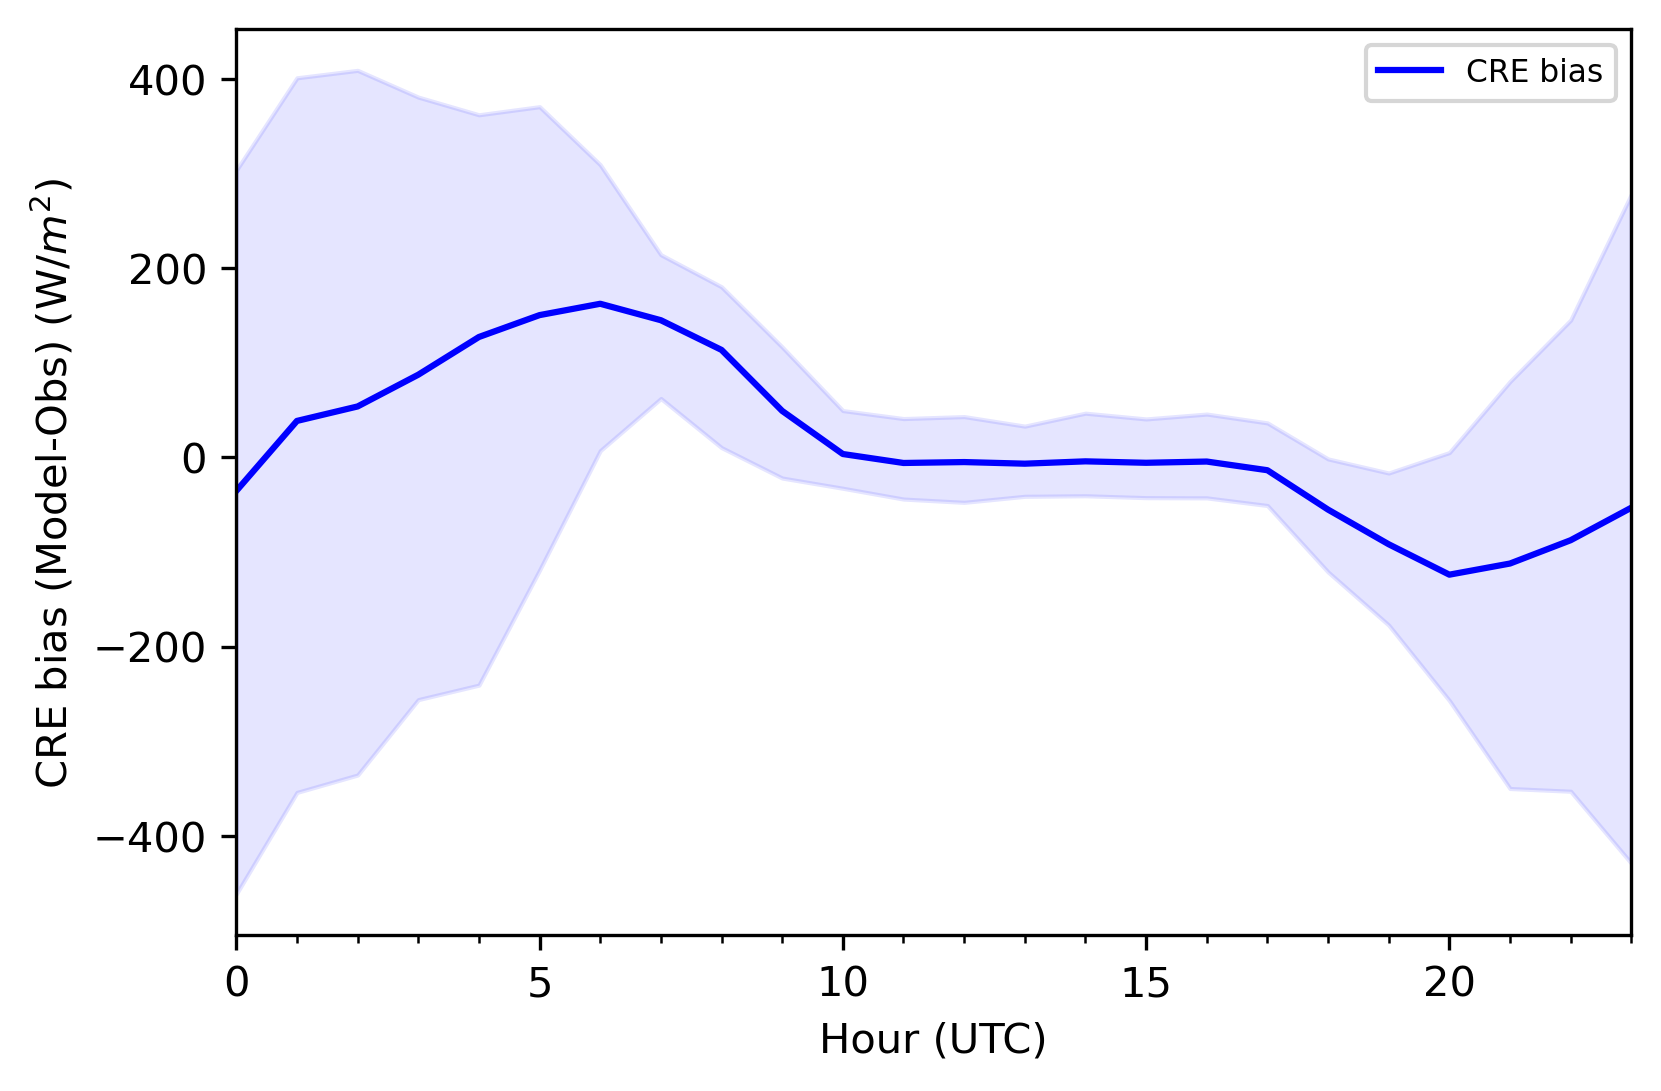

In [85]:
fig = plt.figure(dpi=300)
x = hours

ax1 = plt.subplot()
bias_hourly_CRE_mean.plot(label='CRE bias',color='blue');
ax1.fill_between(x,bias_hourly_CRE_5th,bias_hourly_CRE_95th,color='blue',alpha=0.1)
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.xlabel('Hour (UTC)')
plt.ylabel('CRE bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.legend(fontsize=7.5);

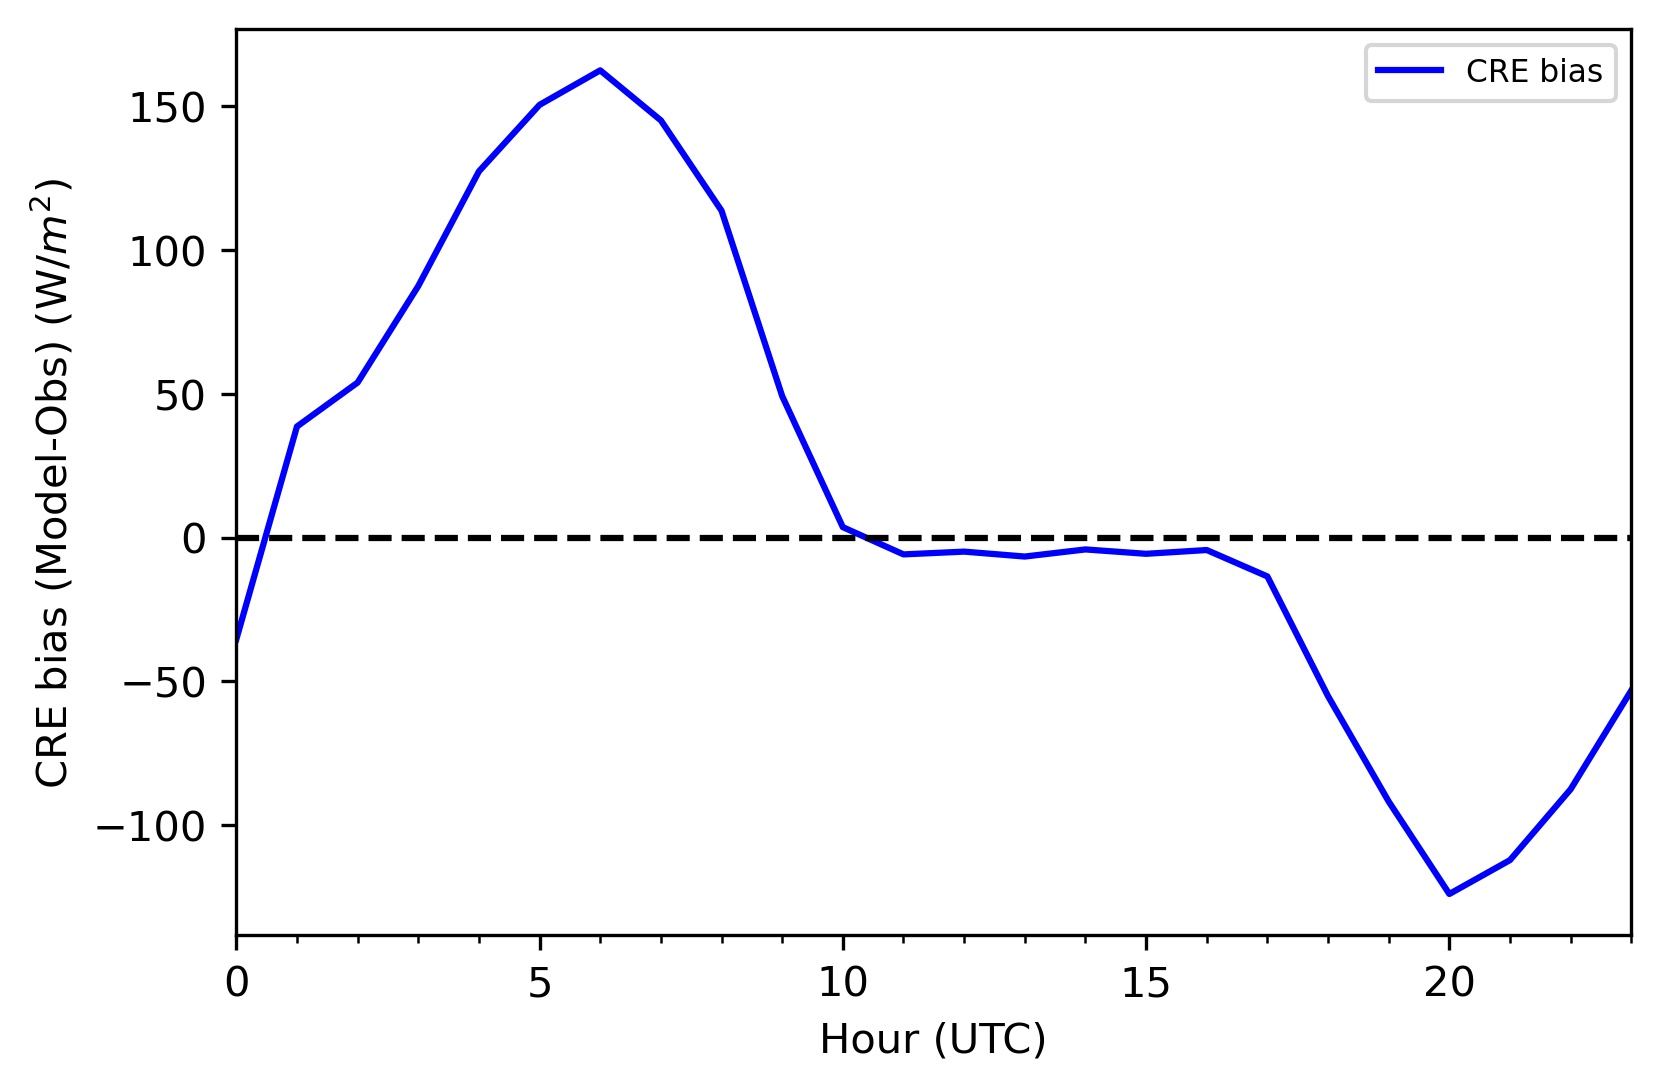

In [87]:
fig = plt.figure(dpi=300)
x = hours

ax1 = plt.subplot()
bias_hourly_CRE_mean.plot(label='CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)')
plt.ylabel('CRE bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
#plt.ylim(-50,150)
plt.legend(fontsize=7.5);

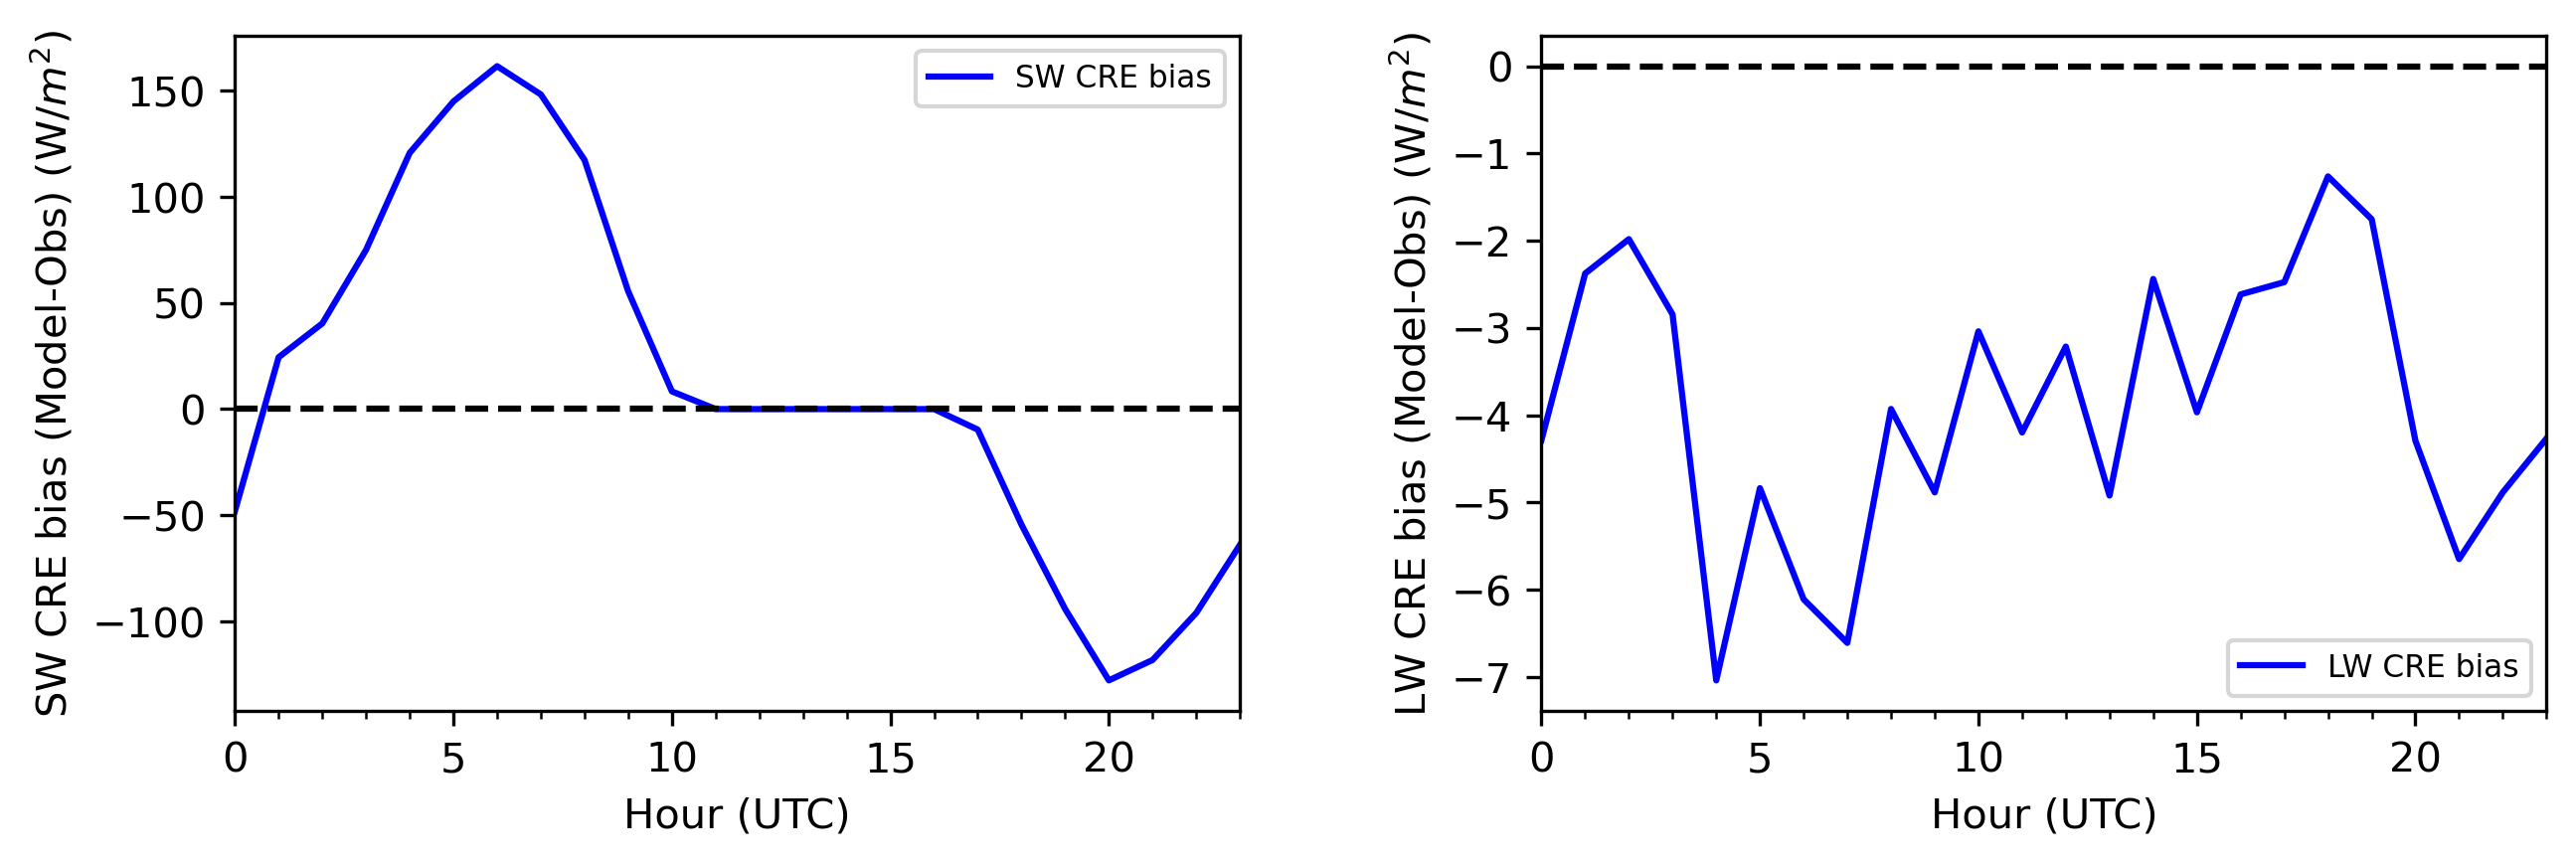

In [88]:
fig = plt.figure(figsize=(10,3),dpi=300)
plt.subplots_adjust(wspace=0.3)
x = hours

ax1 = plt.subplot(121,)
bias_hourly_SWCRE_mean.plot(label='SW CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax1.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)')
plt.ylabel('SW CRE bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.legend(fontsize=7.5);

ax2 = plt.subplot(122,)
bias_hourly_LWCRE_mean.plot(label='LW CRE bias',color='blue');
x_minor_locator = MultipleLocator(1)
ax2.xaxis.set_minor_locator(x_minor_locator)
plt.plot(x,np.zeros(24),"--",color='black')
plt.xlabel('Hour (UTC)')
plt.ylabel('LW CRE bias (Model-Obs) (W/$m^{2}$)')
plt.xlim(0,23)
plt.legend(fontsize=7.5);